# This dataset is availabel of Kaggle.com
Click on this link https://www.kaggle.com/arjunbhasin2013/ccdata

# About the case study
* In the following case study, we will act as a Data-Science team of a bank. 
* The bank has extensive data on their customers for the past 6 months. 
* The marketing team at the bank wants to launch a targeted ad marketing campaign by dividing their customers into at least 3 distinctive groups. 
* It is our Job to help them run a data-driven marketing capaing. For which They want to undersand their customers distingtly

# Introduction

1. Marketing is crucial for the growth and sustainability of any business.
1. Marketers can help build the company’s brand, engage customers, and increase sales.
1. One of the key pain points for marketers is to know their customers and identify their needs.
1. By profiling the customer, marketers can launch a targeted marketing campaign that is tailored to meet specific needs.
1. As we all know if Data is available, techniques of data science and machine learning can be applied to perform market segmentation.

# About the dataset (data-dictionary)

1. CUSTID: Identification of Credit Card holder 
1. BALANCE: Balance amount left in customer's account to 
make purchases
1. BALANCE_FREQUENCY: How frequently the Balance is 
updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
1. PURCHASES: Amount of purchases made from account 
1. ONEOFFPURCHASES: Maximum purchase amount done in one-go
1. INSTALLMENTS_PURCHASES: Amount of purchase done in installment
1. CASH_ADVANCE: Cash in advance given by the user
1. PURCHASES_FREQUENCY: How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)

1. ONEOFF_PURCHASES_FREQUENCY: How 
frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
1. PURCHASES_INSTALLMENTS_FREQUENCY: How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
1. CASH_ADVANCE_FREQUENCY: How 
frequently the cash in advance being paid

1. CASH_ADVANCE_TRX: Number of Transactions made with "Cash in Advance"
1. PURCHASES_TRX: Number of purchase 
transactions made
1. CREDIT_LIMIT: Limit of Credit Card for user
1. PAYMENTS: Amount of Payment done by user
1. MINIMUM_PAYMENTS: Minimum amount of 
payments made by user  
1. PRC_FULL_PAYMENT: Percent of full payment paid by user
1. TENURE: Tenure of credit card service for user


# High level approach to the problem statement

1. Read data
1. Do the priliminary checks for data sanity and data Integrity
1. Exploratory Data Analysis of the data
1. Apply clustering techniques
1. Convery the cluster and their charecteristics to the marketing team. (PCA to visualise the data)

# Read data
**Let us import the libraries which will help us in achiving our objective of segmentation**

In [1]:
# import Dependencies 
import pandas as pd # Pandas is a library to read the data in a tabular format. it is especilly handy in understanding the tabular data and apply discriptive statistics on the data
import numpy as np # numpy is a library for working with matrices / N-Dimentional arrays mosty of most of calculations under the algorithams are done using numpy.
import matplotlib.pyplot as plt # Matplotlib is an extensive library for visualising your data.
import seaborn as sns # seaborn is a advnced visualisation library built on matplotlib. 
from sklearn.preprocessing import StandardScaler, normalize # sklearn is the basic library which is extensively used for implementing ML algorithams, we are import scalers to do data sclalling
from sklearn.cluster import KMeans # we are importing Kmeans algoritham from cluster module of saklearn library
from sklearn.decomposition import PCA # we are import PCA algoritham from decomposition module of sklearn library

**Now that we have imported the libraries, let's import the data set**
* note that this data set is already curated by some other user. You may not get the data in the ready format. data may exist in  multiple tables in a database your / we need to explore and extract relevant data for our problem statement and curate it before even starting with exploratory data analysis.
* Here is the kaggle link for the data set. https://www.kaggle.com/arjunbhasin2013/ccdata

In [2]:
# Import data we will use pandas dataframe object for all our priliminary data processing and understanding
rawdata = pd.read_csv('/content/CC GENERAL.csv')
rawdata.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


**Note: since i am using google colab I have used the colab path after uploading the dataset to the colab environment**
**If you are working in your local environment you will have to specify the entire file path as a string to pandas read_csv function to read the data.[SEE THE PANDAS DOCUMENTATION FOR DETAILS](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html)**

# Check the data sanity and data integirity

Now that we have read our data into a data frame object. Let's begin with checking the data sanaity and data integrity

> DATA INTEGRITY:- By Data Integrity I mean to Check if all the features represent what they say they represent. and if the values are within the range the values for such feature can exist in the real world. we shall check if there are any deviation from the normally observed values. The second aspect shall be accurately explored by using statistics and data distributions and visualising data distributions under `EXPLORATORY DATA ANALYSIS`

> DATA SANITY:- By Data Sanity I mean to check if the all the values in the Data are similar or are there any special charechter or unwanted or human unreadable values in the data including null values. 
* let us check if there any null values in the dataset
* check the datatype of each column
* check shape and size of the dataset

All these tasks can be individually queries using the specific  methods on the dataframe. However we will use `info() method` to extract all the info about the data set required to answer the above questions

In [3]:
rawdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

### Data Sahpe and size
There are 8950 rows (referred as datapoints) and 18 columns (referred as features) approximately it takes 1.2 MB of memory.
### Null values in the data set

We can note that two features namely `CREDIT LIMIT` & `MINIMUM PAYMENTS` have null values (*as `info` method shows non null data any thing less than 8950 in this case is the proof of existance of null values in the features.
### Datatype of each columns
All features except for `CUST ID` are marked as either int or float, that is good. *note: Data has to be in numeric format for any mathmetical operations. Hence ensure that we have converted all our data into numeric format before feeding it to the algorithams. In our case data is already in numeric format and `CUST ID` features is not adding any values to our problem statement, hence we will `delete 'CUST ID' column`

In [4]:
creditcard_data = rawdata.drop('CUST_ID', axis = 1)
creditcard_data.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


*We have deleted the `CUST_ID` column not our data has 17 features. we still need to address the missing values or null values in the data set. As we can not feed null vlaues to the algorithms.* **Before that there is a way to visually see the missing values in the data set based on the indexes. Let's explore that**
We will use `heatmap` from `sns library`

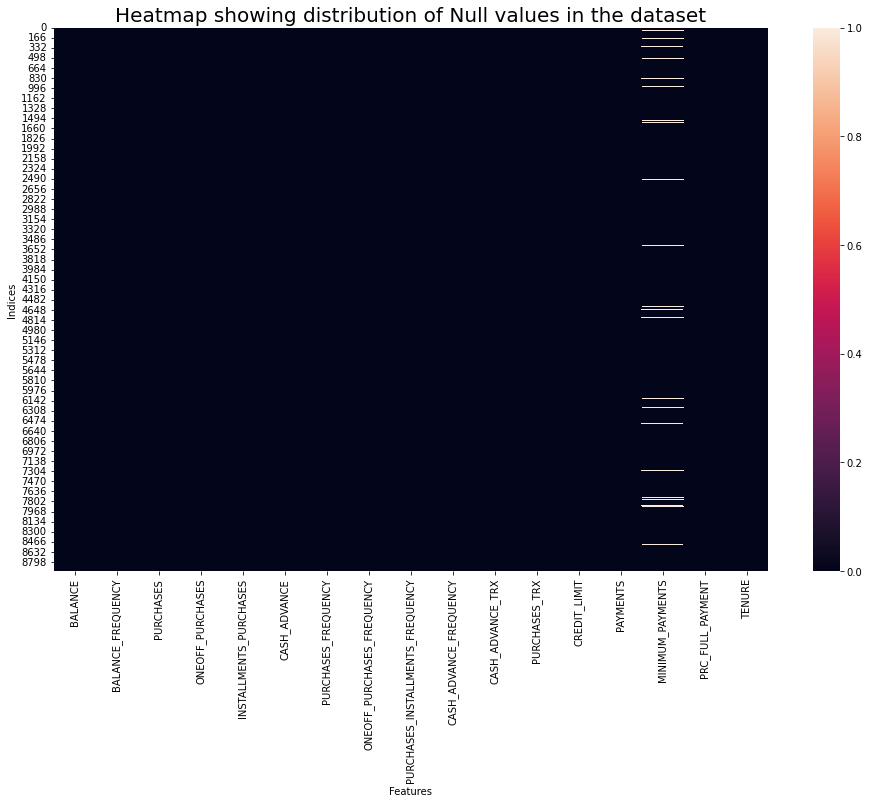

In [5]:
plt.figure(figsize = (16,10)) # we use figure object of matplotlib.pyplot module to customize the output of the plots.
sns.heatmap(creditcard_data.isnull())
plt.title('Heatmap showing distribution of Null values in the dataset', fontsize = 20)
plt.xlabel('Features')
plt.ylabel('Indices')
plt.show()

Hummm! all the white lines in the plot are missing values. Let's now explore how many such values are missing. we will use isnull method

In [6]:
print(f'\nFEATURE NAMES    ------    NUMBER OF NULL VALUES\n')
creditcard_data.isnull().sum()


FEATURE NAMES    ------    NUMBER OF NULL VALUES



BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

So, out of 8950 values in each column `CREDIT_LIMIT` has 1 missing value and `MINIMUM_PAYMENTS` has 313 missing values. 

Approximately 3.5% of data is missing in `MINIMUM_PAYMENTS` FEATURE
Let's check and confirm.


In [7]:
print(f'MINIMUM_PAYMENTS FEATURE HAS {creditcard_data.MINIMUM_PAYMENTS.isnull().sum()/len(creditcard_data)*100:.2f}% MISSING VALUES')

MINIMUM_PAYMENTS FEATURE HAS 3.50% MISSING VALUES


We can take multiple approaches to deal with missing values 

* we can simply delete the data points with missing values - Whcih will lead to loss of information as we will delete one data point for one signle missing value.
* Alternate approach is to Impute the values after consulting the business expeters or domain experts and based on the distributions the features are showing. 
> So for any skewed data it is better to impute the median values and for normally distributed data or near normally distributed data it is better to use mean.

Hence, in the obasence of business experts we shall use statistical techniques to impute the data.

In order to impute the missing values we need to check the distribution of those features. 

> So the best way to understand the data is to apply measures of central tendency and check for `MEAN` and `STANDARD DEVIATION` of the data set.

> In order to understnad the first hand glimps of distribution of the data it is better to observe the percentiles of the data.

So, in order to check the discriptive statistics of the data there is a method in pandas, which will give you count, mean, min, 25 percetile, 50 percentile, 75 percentile and max of data distribution. Let's use the method and see

In [8]:
# Let us check how many unique customer details are available (as per info on kaggle this is for 9000 customers)
print(f'Number of unique customer records is {len(rawdata.CUST_ID.unique())}')

Number of unique customer records is 8950


**So the total number of record is same as total number of unique customers. meaning the values are aggrigated to create this dataset. so it is fair to say the all the values are aggrigated values for last 6 months.**

In [9]:
creditcard_data.describe().T # we are applying .T (transpose) attribute on the dataframe for easy visual

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


On the priliminary investigattion it looks like there are many features are right skewed. let is conduct Univariate analysis using statistical and visual techniques to see more.

# UNIVARIATE ANALYSIS (EDA)

### Feature name: `'BALANCE'`


THE 95TH PERCENTILE FOR BALANCE FEATURE IS "5909.11"



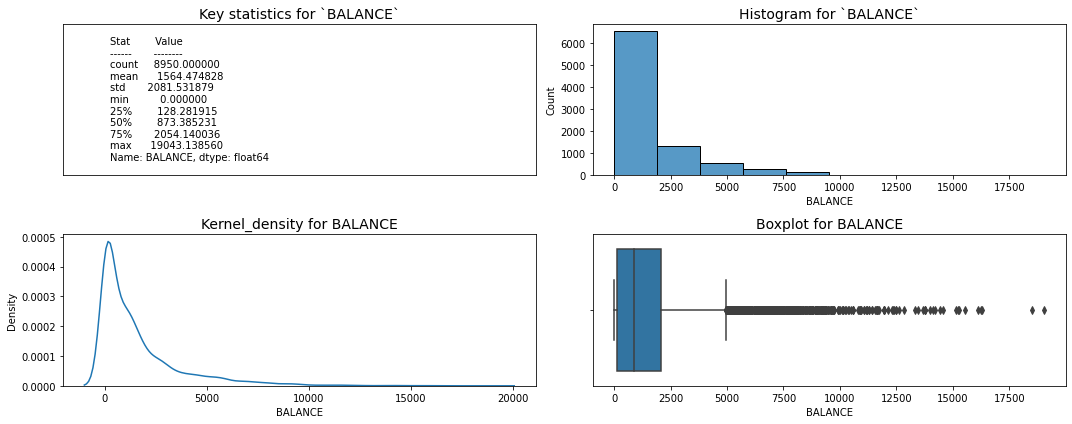

In [10]:
feature = creditcard_data.columns[0]
desc_stat = creditcard_data[feature].describe()
print(f'\nTHE 95TH PERCENTILE FOR {feature} FEATURE IS "{creditcard_data[feature].quantile(0.95):.2f}"\n')
fig, ax = plt.subplots(2,2, figsize = (15,6))
plt.subplot(2,2,1)
plt.text(.1,.1, f'Stat        Value\n------       --------\n{desc_stat}', fontsize = 10)
plt.title(f'Key statistics for `{feature}`', fontsize = 14)
plt.tick_params(left = False, bottom = False, labelleft = False, labelbottom = False)
plt.subplot(222)
sns.histplot(x = creditcard_data[feature], bins = 10)
plt.title(f'Histogram for `{feature}`', fontsize = 14)
plt.subplot(2,2,3)
sns.kdeplot(x=creditcard_data[feature])
plt.title(f'Kernel_density for {feature}', fontsize = 14)
plt.subplot(224)
sns.boxplot(x=creditcard_data[feature])
plt.title(f'Boxplot for {feature}', fontsize = 14)
plt.tight_layout()
plt.show()

**BALANCE: Balance amount left in customer's account to make purchases**

**Note: The `BALANCE` feature represents the balance available in the card account for further transactions and not the outstanding balance to be paid as normally interpretted in india.**

One can clearly infer that the data is right skewed with a very long tail towards the right from th origin. 

This can be inferred from the discriptive statistics. The `median` for the `BALANCE feature` is 873 where as `mean` is 1564 indicating the `right / positive skewness` in the data. 

*Which actualy means that Mejority of the customers hold `high BALANCE` in their card account. only few of them actually use all or most of the available `BALANCE`.*

If we look at the max value and its distance from meadian and also if we see the number of standard deviation the max is from the mean. we can make out the extent of the skewness in the data. **Statistically speaking there will be outliers in the data. However, such outliers are normal in the natural world. so we may not treat or manupulate outliers in this case**

For any normal human being the plots are easyest ways of comprehending the data. so the histogram and the KDE plots clearly exibit the extent of the skewness and the direction of the skewness in the data.

### FEATURE NAME: `'BALANCE_FREQUENCY'`


THE 95TH PERCENTILE FOR BALANCE_FREQUENCY FEATURE IS "1.00"



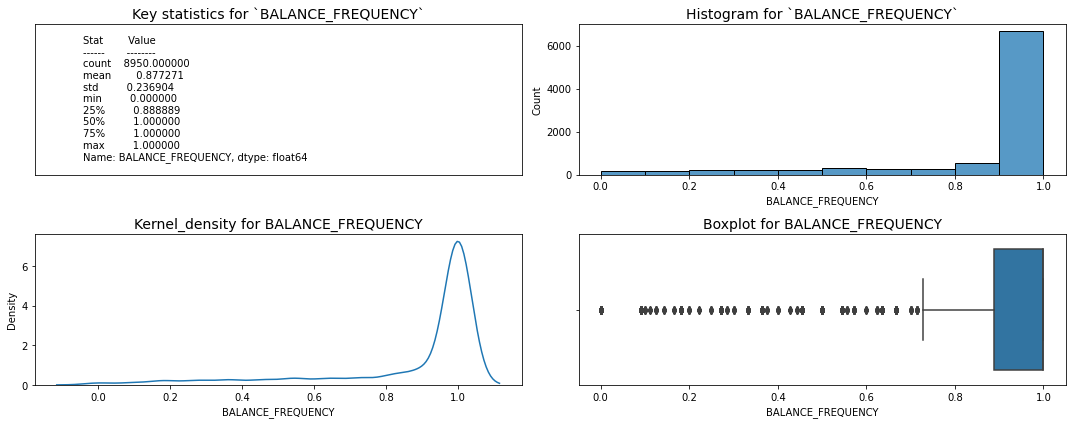



NUMBER OF CUSTOMERS WITH BALANCE_FREQUENCY "0" :- 80


In [11]:
feature = creditcard_data.columns[1]
desc_stat = creditcard_data[feature].describe()
print(f'\nTHE 95TH PERCENTILE FOR {feature} FEATURE IS "{creditcard_data[feature].quantile(0.95):.2f}"\n')
fig, ax = plt.subplots(2,2, figsize = (15,6))
plt.subplot(2,2,1)
plt.text(.1,.1, f'Stat        Value\n------       --------\n{desc_stat}', fontsize = 10)
plt.title(f'Key statistics for `{feature}`', fontsize = 14)
plt.tick_params(left = False, bottom = False, labelleft = False, labelbottom = False)
plt.subplot(222)
sns.histplot(x = creditcard_data[feature], bins = 10)
plt.title(f'Histogram for `{feature}`', fontsize = 14)
plt.subplot(2,2,3)
sns.kdeplot(x=creditcard_data[feature])
plt.title(f'Kernel_density for {feature}', fontsize = 14)
plt.subplot(224)
sns.boxplot(x=creditcard_data[feature])
plt.title(f'Boxplot for {feature}', fontsize = 14)
plt.tight_layout()
plt.show()
print(f'\n\n\033[1mNUMBER OF CUSTOMERS WITH BALANCE_FREQUENCY "0" :- {len(creditcard_data[creditcard_data["BALANCE_FREQUENCY"]==0])}\033[0m')

In [12]:
# Studying the customers with balance frequency zero
print(f"\033[1mCUSTOMER RECORD FOR BALANCE_FREQUENCY EQUAL '0'\033[0m")
creditcard_data[creditcard_data['BALANCE_FREQUENCY'] == 0]

CUSTOMER RECORD FOR BALANCE_FREQUENCY EQUAL '0'


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
99,0.0,0.0,0.00,0.0,0.00,89.849004,0.000000,0.0,0.000000,0.142857,1,0,3000.0,138.021428,NaN,0.0,7
181,0.0,0.0,23.00,0.0,23.00,0.000000,0.083333,0.0,0.083333,0.000000,0,1,5000.0,0.000000,NaN,0.0,12
654,0.0,0.0,0.00,0.0,0.00,310.888779,0.000000,0.0,0.000000,0.083333,1,0,9000.0,0.000000,NaN,0.0,12
860,0.0,0.0,199.88,0.0,199.88,0.000000,0.750000,0.0,0.750000,0.000000,0,14,4000.0,0.000000,NaN,0.0,12
1131,0.0,0.0,12.65,0.0,12.65,0.000000,0.083333,0.0,0.083333,0.000000,0,1,5000.0,0.000000,NaN,0.0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8191,0.0,0.0,52.50,0.0,52.50,0.000000,0.416667,0.0,0.416667,0.000000,0,5,3000.0,57.506797,NaN,0.0,12
8329,0.0,0.0,39.54,0.0,39.54,0.000000,0.166667,0.0,0.166667,0.000000,0,2,3000.0,181.014541,NaN,0.0,12
8404,0.0,0.0,64.62,0.0,64.62,0.000000,0.250000,0.0,0.250000,0.000000,0,3,1000.0,0.000000,NaN,0.0,12
8484,0.0,0.0,120.82,0.0,120.82,0.000000,0.500000,0.0,0.500000,0.000000,0,6,1000.0,275.029692,NaN,0.0,12


**BALANCE_FREQUENCY: How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)**

This feature looks like a score given by the banks internal team for using or transaction on the credit card. For every transaction there will be a change in the `available BALANCE` on the card account. 

looking at plots above it is clear that most of our customer use the credit card regulary for their transactions. `meadian score of 1` shows that atleast 50% of our customers use the card regulary and their `BALANCE` in the card is updated frequently. the `mean score of .87` goes on to show that the more than 50% of the customer frequently update `BALANCE` on their card. These are good indicators for business.

***There are around 80 customer who dont use our card at all nither they make purchases nor make payemnts.***
*ALL THESE 80 CUSTOMERS HAVE THEIR BALANCE AS "0" AND MEJORITY OF THESE CUSTOMERS HAVE NOT MADE ANY PAYMENT. AROUND 50% OF THEM HAVE MADE PURCHASES, OF THOSE WHO MADE PURCHASES MEJORITY OF THEM HAVE MAKE INSTALLMENT PURCHASES. MOST OF THESE CUSTOMER HAVE NaN IN THE MINIMUM PAYMENT COLUMN*

**NOTE THAT I HAVE USED "INTERACTIVE TABLE" FEATURE OF COLAB TO MAKE SOME OF THE OBSERVATIONS**

### FEATURE NAME: `'PURCHASES'`


THE 95TH PERCENTILE FOR PURCHASES FEATURE IS "3998.62"



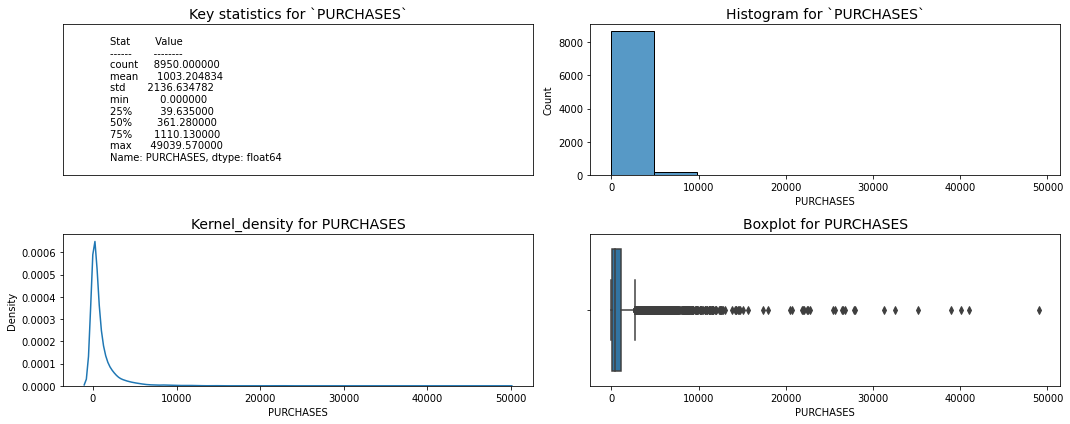



Number of customers whose purchases are `zero` in 6 months :- 2044


In [13]:
feature = creditcard_data.columns[2]
desc_stat = creditcard_data[feature].describe()
print(f'\nTHE 95TH PERCENTILE FOR {feature} FEATURE IS "{creditcard_data[feature].quantile(0.95):.2f}"\n')
fig, ax = plt.subplots(2,2, figsize = (15,6))
plt.subplot(2,2,1)
plt.text(.1,.1, f'Stat        Value\n------       --------\n{desc_stat}', fontsize = 10)
plt.title(f'Key statistics for `{feature}`', fontsize = 14)
plt.tick_params(left = False, bottom = False, labelleft = False, labelbottom = False)
plt.subplot(222)
sns.histplot(x = creditcard_data[feature], bins = 10)
plt.title(f'Histogram for `{feature}`', fontsize = 14)
plt.subplot(2,2,3)
sns.kdeplot(x=creditcard_data[feature])
plt.title(f'Kernel_density for {feature}', fontsize = 14)
plt.subplot(224)
sns.boxplot(x=creditcard_data[feature])
plt.title(f'Boxplot for {feature}', fontsize = 14)
plt.tight_layout()
plt.show()
print(f'\n\nNumber of customers whose purchases are `zero` in 6 months :- {len(creditcard_data[creditcard_data["PURCHASES"]==0])}')

In [14]:
# Studying the customers with puchases more than 40000
print(f"\033[1mCUSTOMER RECORD FOR PURCHASES GREATER THAN 40000\033[0m")
creditcard_data[creditcard_data['PURCHASES'] > 40000].T

CUSTOMER RECORD FOR PURCHASES GREATER THAN 40000


,501,550,1256
BALANCE,13479.288210,11547.520010,4010.621974
BALANCE_FREQUENCY,1.000000,1.000000,1.000000
PURCHASES,41050.400000,49039.570000,40040.710000
ONEOFF_PURCHASES,40624.060000,40761.250000,24543.520000
INSTALLMENTS_PURCHASES,426.340000,8278.320000,15497.190000
CASH_ADVANCE,0.000000,558.166886,0.000000
PURCHASES_FREQUENCY,0.833333,1.000000,1.000000
ONEOFF_PURCHASES_FREQUENCY,0.666667,1.000000,1.000000
PURCHASES_INSTALLMENTS_FREQUENCY,0.416667,0.916667,1.000000
CASH_ADVANCE_FREQUENCY,0.000000,0.083333,0.000000


**PURCHASES: Amount of purchases made from account**

The `PURCHASES` feature can either represent cumulative purhcase values for a period such as month or year or since inception. since we have `ONEOFF_PURCHASES` as an additional feature we can conclude that this is a cumulative aggrigate. However, we will `infer the period as '6 MONTHS'` for convinience. 

One can infer from the plot that `PURCHASES FEATURE` is heavily right / positively skewed. The minimum cumulative purchase is `0` which means that some of the customers don't use the card for purchase which is not so normal in my opinion. while `median purchases are $361` which seem to be very low. so we can infer from the data that atlease 50% customers dont contribute toward the earnings from the credit card. `mean purchase are $1003` for cumulative standards it is very low. 

*In this case the `max purchases is $49039` where as `75th percetile is only $1110` this needs some investigation as the deviation is very high. Even the 95th percetile is just under $4000. which could be one of such purchases which may be treated as an outlier* 

Thre are atleast 3 customers with purchases above 40K. some of the regular consumers and user of our card services. all three customers have good payment record. It is good for business. we can not say they are outliers. Only drawback is the data is for only 6 months whereas all three customer tenure is 12 years. we are working on a fraction of customer tenure.

### FEATURE NAME: `'ONEOFF_PURCHASES'`


THE 95TH PERCENTILE FOR ONEOFF_PURCHASES FEATURE IS "2671.09"



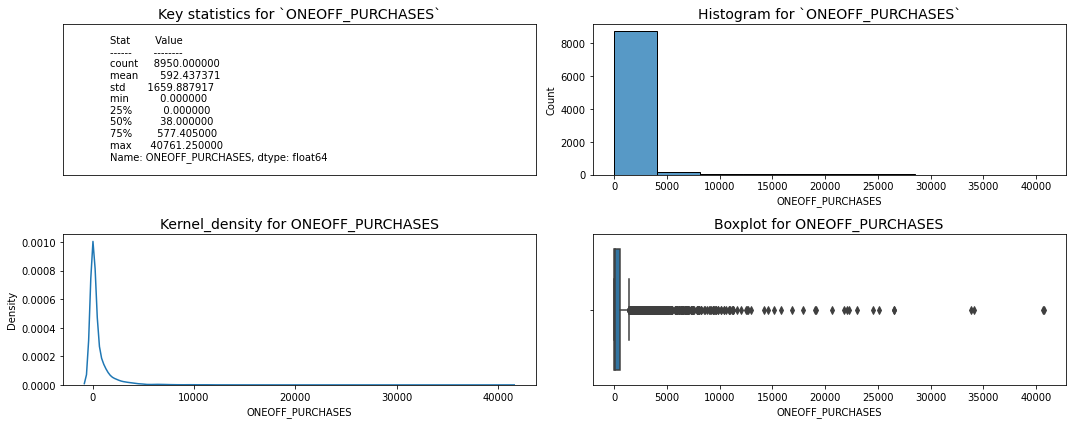

In [15]:
feature = creditcard_data.columns[3]
desc_stat = creditcard_data[feature].describe()
print(f'\nTHE 95TH PERCENTILE FOR {feature} FEATURE IS "{creditcard_data[feature].quantile(0.95):.2f}"\n')
fig, ax = plt.subplots(2,2, figsize = (15,6))
plt.subplot(2,2,1)
plt.text(.1,.1, f'Stat        Value\n------       --------\n{desc_stat}', fontsize = 10)
plt.title(f'Key statistics for `{feature}`', fontsize = 14)
plt.tick_params(left = False, bottom = False, labelleft = False, labelbottom = False)
plt.subplot(222)
sns.histplot(x = creditcard_data[feature], bins = 10)
plt.title(f'Histogram for `{feature}`', fontsize = 14)
plt.subplot(2,2,3)
sns.kdeplot(x=creditcard_data[feature])
plt.title(f'Kernel_density for {feature}', fontsize = 14)
plt.subplot(224)
sns.boxplot(x=creditcard_data[feature])
plt.title(f'Boxplot for {feature}', fontsize = 14)
plt.tight_layout()
plt.show()

In [16]:
# Studying the customers with oneoff purchases greater than 30000
print(f"\033[1mCUSTOMER RECORD FOR ONEOFF PURCHASES GREATER THAN 30000\033[0m")
creditcard_data[creditcard_data['ONEOFF_PURCHASES'] >30000].T

CUSTOMER RECORD FOR ONEOFF PURCHASES GREATER THAN 30000


,501,550,1604,3937
BALANCE,13479.288210,11547.520010,3391.702180,2997.977825
BALANCE_FREQUENCY,1.000000,1.000000,1.000000,1.000000
PURCHASES,41050.400000,49039.570000,38902.710000,35131.160000
ONEOFF_PURCHASES,40624.060000,40761.250000,33803.840000,34087.730000
INSTALLMENTS_PURCHASES,426.340000,8278.320000,5098.870000,1043.430000
CASH_ADVANCE,0.000000,558.166886,0.000000,0.000000
PURCHASES_FREQUENCY,0.833333,1.000000,1.000000,1.000000
ONEOFF_PURCHASES_FREQUENCY,0.666667,1.000000,1.000000,1.000000
PURCHASES_INSTALLMENTS_FREQUENCY,0.416667,0.916667,1.000000,0.833333
CASH_ADVANCE_FREQUENCY,0.000000,0.083333,0.000000,0.000000


**ONEOFFPURCHASES: Maximum purchase amount done in one-go**

This feature represents maximum single transaction value for a card / customer. 

This feature represents the similar distribution as purchases. in this case we can confirm that atleast 25% customers or cards have not utilized the card or any transaction in last 6 months.

Even `ONEOFF_PURCHASE` feature is highly positively skewed. showing mejority of our customers have low value transaction on their card. 

`Mean is $592 and Median is $38 and 75th percentile is $577 and 95th percentile is $40761.` So it appears that there is one such single transaction which far away from all other normal transactions. 

### FEATURE NAME: `'INSTALLMENT_PURCHASES'`


THE 95TH PERCENTILE FOR INSTALLMENTS_PURCHASES FEATURE IS "1750.09"



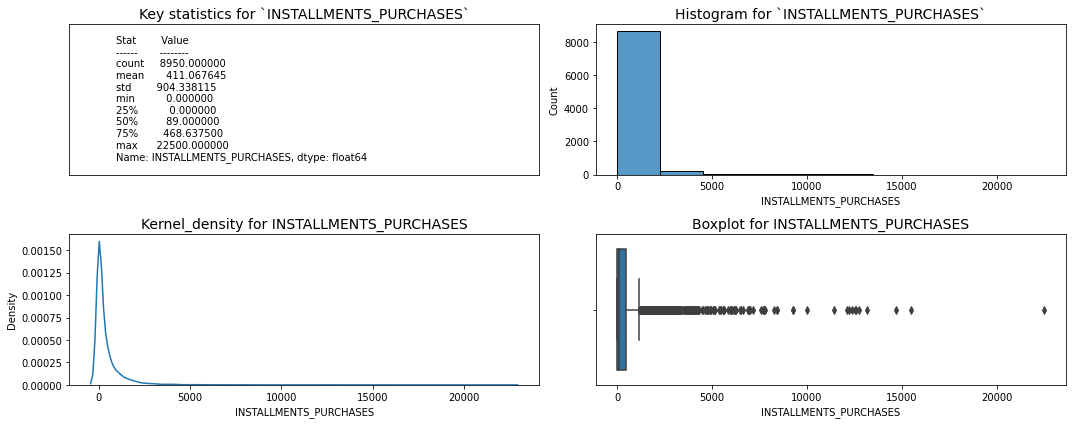

In [17]:
feature = creditcard_data.columns[4]
desc_stat = creditcard_data[feature].describe()
print(f'\nTHE 95TH PERCENTILE FOR {feature} FEATURE IS "{creditcard_data[feature].quantile(0.95):.2f}"\n')
fig, ax = plt.subplots(2,2, figsize = (15,6))
plt.subplot(2,2,1)
plt.text(.1,.1, f'Stat        Value\n------       --------\n{desc_stat}', fontsize = 10)
plt.title(f'Key statistics for `{feature}`', fontsize = 14)
plt.tick_params(left = False, bottom = False, labelleft = False, labelbottom = False)
plt.subplot(222)
sns.histplot(x = creditcard_data[feature], bins = 10)
plt.title(f'Histogram for `{feature}`', fontsize = 14)
plt.subplot(2,2,3)
sns.kdeplot(x=creditcard_data[feature])
plt.title(f'Kernel_density for {feature}', fontsize = 14)
plt.subplot(224)
sns.boxplot(x=creditcard_data[feature])
plt.title(f'Boxplot for {feature}', fontsize = 14)
plt.tight_layout()
plt.show()

In [18]:
# Studying the customers who made installment purchase greater than 15000
print(f"\033[1mCUSTOMER RECORD FOR INSTALLMANES_PURCHASES\033[0m")
creditcard_data[creditcard_data['INSTALLMENTS_PURCHASES'] >= 15000].T

CUSTOMER RECORD FOR INSTALLMANES_PURCHASES


,1256,5260
BALANCE,4010.621974,4060.710208
BALANCE_FREQUENCY,1.000000,0.727273
PURCHASES,40040.710000,22500.000000
ONEOFF_PURCHASES,24543.520000,0.000000
INSTALLMENTS_PURCHASES,15497.190000,22500.000000
CASH_ADVANCE,0.000000,0.000000
PURCHASES_FREQUENCY,1.000000,0.500000
ONEOFF_PURCHASES_FREQUENCY,1.000000,0.000000
PURCHASES_INSTALLMENTS_FREQUENCY,1.000000,0.416667
CASH_ADVANCE_FREQUENCY,0.000000,0.000000


**INSTALLMENTS_PURCHASES: Amount of purchase done in installment**

Even this feature represents cumulative value of purchases in installments. The distribution is positively skewed. 

Considering the `Mean, Median, 75th percentive values we can conclude, mejority of our customers have low transaction value under installment purchases.

We can futher say that 95% of our customers cumulative installment purchases are less than $1750.

### FEATURE NAME: `'CASH ADVANCE'`


THE 95TH PERCENTILE FOR CASH_ADVANCE FEATURE IS "4647.17"



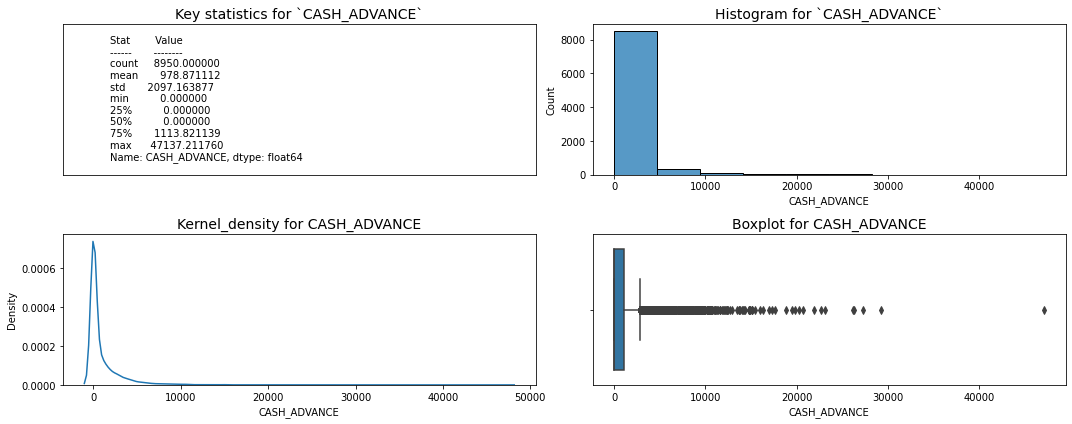

In [19]:
feature = creditcard_data.columns[5]
desc_stat = creditcard_data[feature].describe()
print(f'\nTHE 95TH PERCENTILE FOR {feature} FEATURE IS "{creditcard_data[feature].quantile(0.95):.2f}"\n')
fig, ax = plt.subplots(2,2, figsize = (15,6))
plt.subplot(2,2,1)
plt.text(.1,.1, f'Stat        Value\n------       --------\n{desc_stat}', fontsize = 10)
plt.title(f'Key statistics for `{feature}`', fontsize = 14)
plt.tick_params(left = False, bottom = False, labelleft = False, labelbottom = False)
plt.subplot(222)
sns.histplot(x = creditcard_data[feature], bins = 10)
plt.title(f'Histogram for `{feature}`', fontsize = 14)
plt.subplot(2,2,3)
sns.kdeplot(x=creditcard_data[feature])
plt.title(f'Kernel_density for {feature}', fontsize = 14)
plt.subplot(224)
sns.boxplot(x=creditcard_data[feature])
plt.title(f'Boxplot for {feature}', fontsize = 14)
plt.tight_layout()
plt.show()

In [20]:
# Checking the customers with cash advance more than 30000
print(f"\033[1mCUSTOMER RECORD FOR CAS_ADVANCE GREATER THAN 30000\033[0m")
creditcard_data[creditcard_data['CASH_ADVANCE'] > 30000].T

CUSTOMER RECORD FOR CAS_ADVANCE GREATER THAN 30000


,2159
BALANCE,10905.053810
BALANCE_FREQUENCY,1.000000
PURCHASES,431.930000
ONEOFF_PURCHASES,133.500000
INSTALLMENTS_PURCHASES,298.430000
CASH_ADVANCE,47137.211760
PURCHASES_FREQUENCY,0.583333
ONEOFF_PURCHASES_FREQUENCY,0.250000
PURCHASES_INSTALLMENTS_FREQUENCY,0.500000
CASH_ADVANCE_FREQUENCY,1.000000


**CASH_ADVANCE: Cash in advance given by the user**

Even the `CASH_ADVANCE` feature is right / positively skewed.

looking at `mean, median and 75th percentile` we can conclude that atleast 50% of our customers don't make advance payments. Futher on comparison of `mean, median and max` we can say that there are outliers for this feature.

### FEATURE NAME: `'PURCHASES_FREQUENCY'`


THE 95TH PERCENTILE FOR PURCHASES_FREQUENCY FEATURE IS "1.00"



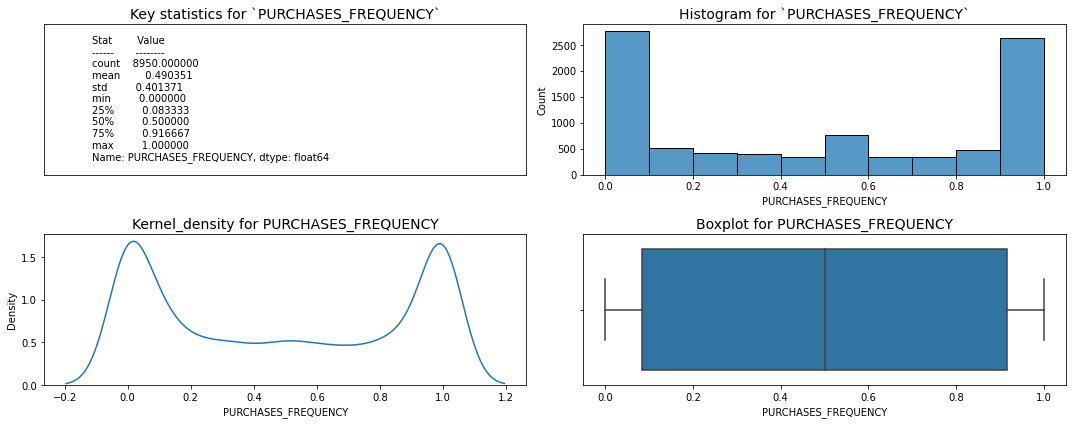

In [21]:
feature = creditcard_data.columns[6]
desc_stat = creditcard_data[feature].describe()
print(f'\nTHE 95TH PERCENTILE FOR {feature} FEATURE IS "{creditcard_data[feature].quantile(0.95):.2f}"\n')
fig, ax = plt.subplots(2,2, figsize = (15,6))
plt.subplot(2,2,1)
plt.text(.1,.1, f'Stat        Value\n------       --------\n{desc_stat}', fontsize = 10)
plt.title(f'Key statistics for `{feature}`', fontsize = 14)
plt.tick_params(left = False, bottom = False, labelleft = False, labelbottom = False)
plt.subplot(222)
sns.histplot(x = creditcard_data[feature], bins = 10)
plt.title(f'Histogram for `{feature}`', fontsize = 14)
plt.subplot(2,2,3)
sns.kdeplot(x=creditcard_data[feature])
plt.title(f'Kernel_density for {feature}', fontsize = 14)
plt.subplot(224)
sns.boxplot(x=creditcard_data[feature])
plt.title(f'Boxplot for {feature}', fontsize = 14)
plt.tight_layout()
plt.show()

**PURCHASES_FREQUENCY: How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)**

This feature is a bimodal data, there is high concentration of customers at 0 and 1,  meaning some customers are very active and some customers are inactive and rest of them fall inbetween.

We can further interpret the frequency if we know how these scores are calculated or if we knew what is the benchmark score for puchase_frequency for a customer to be considered good customer. However in the absence of the info we can't make such interpretations without making asumptions. In such cases it is best to consult business to understand the same.

### FEATURE NAME: `'ONEOFF_PURCHASES_FREQUENCY'`


THE 95TH PERCENTILE FOR ONEOFF_PURCHASES_FREQUENCY FEATURE IS "1.00"



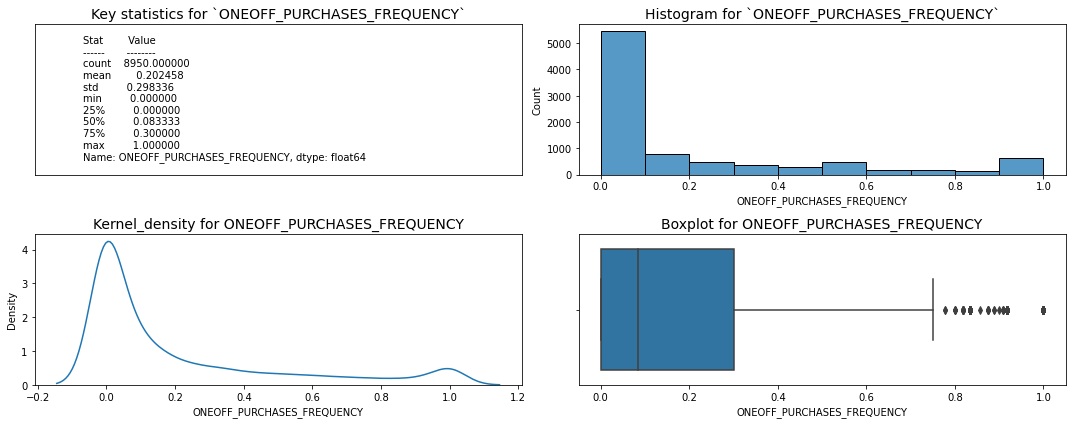

In [22]:
feature = creditcard_data.columns[7]
desc_stat = creditcard_data[feature].describe()
print(f'\nTHE 95TH PERCENTILE FOR {feature} FEATURE IS "{creditcard_data[feature].quantile(0.95):.2f}"\n')
fig, ax = plt.subplots(2,2, figsize = (15,6))
plt.subplot(2,2,1)
plt.text(.1,.1, f'Stat        Value\n------       --------\n{desc_stat}', fontsize = 10)
plt.title(f'Key statistics for `{feature}`', fontsize = 14)
plt.tick_params(left = False, bottom = False, labelleft = False, labelbottom = False)
plt.subplot(222)
sns.histplot(x = creditcard_data[feature], bins = 10)
plt.title(f'Histogram for `{feature}`', fontsize = 14)
plt.subplot(2,2,3)
sns.kdeplot(x=creditcard_data[feature])
plt.title(f'Kernel_density for {feature}', fontsize = 14)
plt.subplot(224)
sns.boxplot(x=creditcard_data[feature])
plt.title(f'Boxplot for {feature}', fontsize = 14)
plt.tight_layout()
plt.show()

In [23]:
# Checking customer with oneoff purchases frequency greater than 1
print(f"\033[1mCUSTOMER RECORD FOR ONEOFF_PURCHASES_FREQUENCY GREATER THAN OR EQUAL 1\033[0m")
creditcard_data[creditcard_data['ONEOFF_PURCHASES_FREQUENCY'] >= 1].T

CUSTOMER RECORD FOR ONEOFF_PURCHASES_FREQUENCY GREATER THAN OR EQUAL 1


,2,6,76,84,85,139,144,151,156,158,171,174,197,221,235,242,249,253,273,290,298,311,312,327,329,346,355,370,373,391,411,439,450,484,485,492,494,507,515,550,...,6400,6443,6512,6626,6632,6640,6648,6660,6887,6980,7049,7098,7100,7152,7190,7235,7252,7277,7319,7473,7508,7553,7580,7629,7655,7661,7759,7761,7816,7818,7819,7911,7921,8005,8073,8098,8352,8489,8534,8662
BALANCE,2495.148862,627.260806,1727.638449,1935.362486,134.917202,2235.103331,2163.678757,1523.911458,5837.105453,2765.748281,975.942008,11972.011040,130.251538,3061.213971,4014.388265,1272.927288,7938.559134,185.640313,5131.319584,280.142117,2503.107213,1329.967543,515.904786,2459.862339,353.198215,1897.672025,1937.246177,426.372628,1128.229387,1535.248256,62.287137,4479.115547,1534.969344,285.813075,204.329381,813.185305,3563.236920,2643.343414,98.420888,11547.520010,...,1434.793889,2504.312118,3759.848908,1670.918981,57.491021,348.342172,109.697529,1608.163254,6.955591,48.578408,1300.204230,265.920698,2.508768,416.601199,395.938840,162.267397,16.967335,561.003319,1144.128891,51.199057,108.857699,2017.391656,88.350880,300.012533,208.581872,717.764625,1366.778251,2134.176153,532.738123,840.144184,377.723728,530.574252,184.212569,196.626598,248.626137,1141.905542,572.838755,289.096953,21.168201,599.909949
BALANCE_FREQUENCY,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.909091,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.909091,1.000000,1.000000,0.454545,1.000000,1.000000,1.000000,0.818182,1.000000,1.000000,1.000000,0.181818,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
PURCHASES,773.170000,7091.010000,606.110000,4915.600000,1247.800000,720.600000,5779.360000,4075.370000,3488.490000,7283.310000,10221.350000,5715.000000,1343.190000,1829.200000,1189.520000,5350.190000,3677.520000,1703.230000,32539.780000,2236.490000,733.900000,2009.120000,5359.020000,678.000000,3085.690000,422.180000,3018.930000,5749.960000,5068.880000,857.360000,1263.290000,759.150000,1476.190000,3220.090000,6558.550000,8194.050000,709.900000,26402.390000,907.370000,49039.570000,...,467.880000,8631.000000,7472.370000,1543.830000,785.960000,11878.250000,1530.370000,1130.600000,630.420000,673.100000,96.690000,3148.360000,302.910000,4266.250000,991.480000,907.990000,2767.850000,11577.000000,1373.270000,1319.040000,3224.340000,12024.370000,697.910000,3286.410000,2608.020000,3358.250000,5065.830000,4253.640000,5403.840000,2790.720000,4587.210000,5221.420000,1292.760000,2017.110000,2635.250000,8.400000,442.230000,3106.100000,236.400000,4947.320000
ONEOFF_PURCHASES,773.170000,6402.630000,606.110000,4515.340000,1247.800000,720.600000,3436.530000,3322.280000,3262.250000,5087.310000,7141.380000,4685.540000,1082.790000,1792.700000,1189.520000,4783.340000,3543.730000,1703.230000,26547.430000,758.520000,733.900000,1296.680000,2399.780000,678.000000,3032.970000,422.180000,1702.620000,5439.960000,3529.880000,857.360000,279.990000,759.150000,1476.190000,2941.390000,6558.550000,7280.270000,609.900000,22257.390000,907.370000,40761.250000,...,467.880000,6983.430000,6845.820000,1406.330000,383.840000,7958.960000,1530.370000,1130.600000,342.530000,646.610000,96.690000,2415.750000,302.910000,2214.050000,707.020000,907.990000,495.590000,10975.000000,688.150000,1319.040000,3224.340000,11224.100000,477.910000,2689.440000,2155.670000,3358.250000,4539.700000,2666.320000,642.520000,2156.940000,4558.290000,2202.780000,653.760000,1056.660000,2635.250000,8.400000,339.640000,2368.600000,8.400000,3149.590000
INSTALLMENTS_PURCHASES,0.000000,688.380000,0.000000,400.260000,0.000000,

**ONEOFF_PURCHASES_FREQUENCY: How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)**

Looks like most of our customers don't make frequent oneoff_purchases.

There are few customer who make very frequent one of purchases.

We can further note that atleast 25% of our customers don't make oneoff_purchases at all. and atleast 50% of our customers make oneoff_purchases less then 10% of times. Over 5000 customers either don't do oneoff_purchases or they do it less than 10% of times. (note: it is assumed that oneoff_purchases_frequency is calcluated by deviding `times oneoff_purchases` with `total number of purchases`)

### FEATURE NAME: `'PURCHASES_INSTALLMENTS_FREQUENCY'`


THE 95TH PERCENTILE FOR PURCHASES_INSTALLMENTS_FREQUENCY FEATURE IS "1.00"



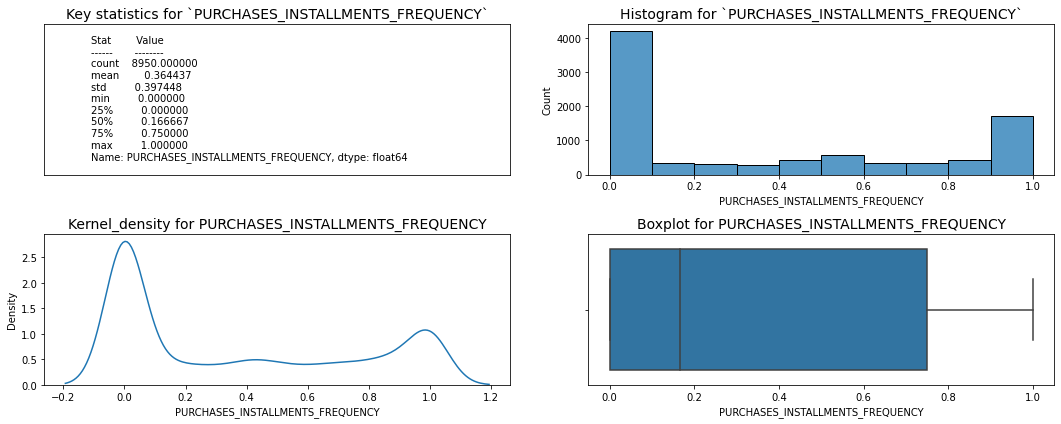

In [24]:
feature = creditcard_data.columns[8]
desc_stat = creditcard_data[feature].describe()
print(f'\nTHE 95TH PERCENTILE FOR {feature} FEATURE IS "{creditcard_data[feature].quantile(0.95):.2f}"\n')
fig, ax = plt.subplots(2,2, figsize = (15,6))
plt.subplot(2,2,1)
plt.text(.1,.1, f'Stat        Value\n------       --------\n{desc_stat}', fontsize = 10)
plt.title(f'Key statistics for `{feature}`', fontsize = 14)
plt.tick_params(left = False, bottom = False, labelleft = False, labelbottom = False)
plt.subplot(222)
sns.histplot(x = creditcard_data[feature], bins = 10)
plt.title(f'Histogram for `{feature}`', fontsize = 14)
plt.subplot(2,2,3)
sns.kdeplot(x=creditcard_data[feature])
plt.title(f'Kernel_density for {feature}', fontsize = 14)
plt.subplot(224)
sns.boxplot(x=creditcard_data[feature])
plt.title(f'Boxplot for {feature}', fontsize = 14)
plt.tight_layout()
plt.show()

**PURCHASES_INSTALLMENTS_FREQUENCY: How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)**

This also shows the same tendencies as `'ONEOFF_PURCHASES_FREQUENCY'`. We can note that just over 1000 customers are frequent buyers.

### FEATURE NAME `'CASH_ADVANCE_FREQUENCY'`


THE 95TH PERCENTILE FOR CASH_ADVANCE_FREQUENCY FEATURE IS "0.58"



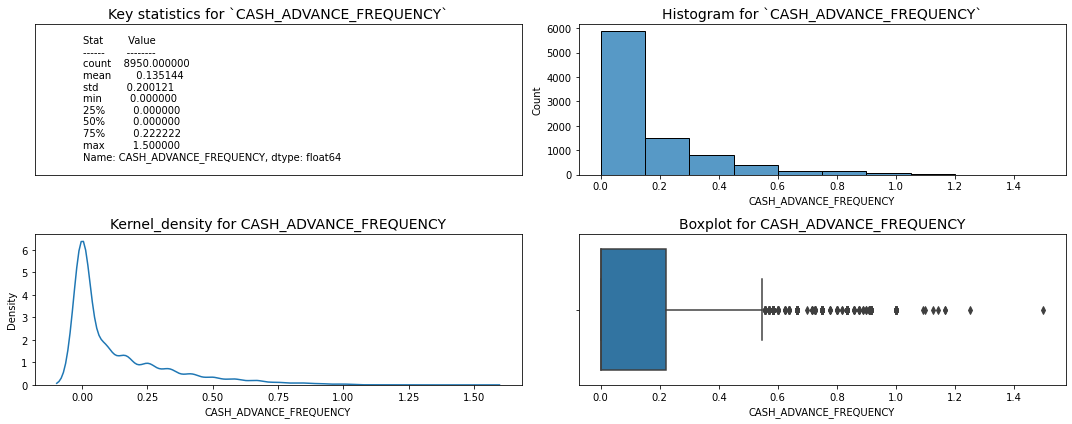

In [25]:
feature = creditcard_data.columns[9]
desc_stat = creditcard_data[feature].describe()
print(f'\nTHE 95TH PERCENTILE FOR {feature} FEATURE IS "{creditcard_data[feature].quantile(0.95):.2f}"\n')
fig, ax = plt.subplots(2,2, figsize = (15,6))
plt.subplot(2,2,1)
plt.text(.1,.1, f'Stat        Value\n------       --------\n{desc_stat}', fontsize = 10)
plt.title(f'Key statistics for `{feature}`', fontsize = 14)
plt.tick_params(left = False, bottom = False, labelleft = False, labelbottom = False)
plt.subplot(222)
sns.histplot(x = creditcard_data[feature], bins = 10)
plt.title(f'Histogram for `{feature}`', fontsize = 14)
plt.subplot(2,2,3)
sns.kdeplot(x=creditcard_data[feature])
plt.title(f'Kernel_density for {feature}', fontsize = 14)
plt.subplot(224)
sns.boxplot(x=creditcard_data[feature])
plt.title(f'Boxplot for {feature}', fontsize = 14)
plt.tight_layout()
plt.show()

In [26]:
# Checking customer with cash advance frequency greater than 1
print(f"\033[1mCUSTOMER RECORD FOR CASH_ADVANCE_FREQUENCY GREATER THAN 1\033[0m")
creditcard_data[creditcard_data['CASH_ADVANCE_FREQUENCY'] >= 1].T

CUSTOMER RECORD FOR CASH_ADVANCE_FREQUENCY GREATER THAN 1


,453,520,681,735,842,1032,1505,1626,1778,2020,2159,2555,2608,2869,3038,3178,3253,3261,4515,5116,5287,5312,5319,5446,5497,6112,6969,8055,8208,8315,8365,8835,8858
BALANCE,9601.071318,15258.225900,5656.069801,7715.659048,8220.740014,1133.090254,5227.616927,2876.009336,6836.552992,7333.442833,10905.053810,5906.184924,7801.511533,4420.693904,3846.742530,4504.793340,5709.486507,3688.371995,6956.376540,1780.188356,7268.706380,7395.887570,5481.738308,4837.835705,4241.864828,3506.489102,2616.764771,1917.895730,492.947466,2648.244646,3857.562230,1868.576501,812.934042
BALANCE_FREQUENCY,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.833333,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.909091,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
PURCHASES,238.340000,529.300000,362.360000,0.000000,5197.220000,85.920000,0.000000,152.610000,0.000000,320.800000,431.930000,141.800000,231.400000,0.000000,0.000000,0.000000,0.000000,0.000000,11500.940000,845.670000,306.910000,0.000000,0.000000,1283.400000,225.080000,0.000000,72.900000,285.070000,0.000000,0.000000,0.000000,1337.340000,50.000000
ONEOFF_PURCHASES,0.000000,529.300000,362.360000,0.000000,4001.410000,0.000000,0.000000,152.610000,0.000000,0.000000,133.500000,141.800000,231.400000,0.000000,0.000000,0.000000,0.000000,0.000000,3091.010000,31.500000,306.910000,0.000000,0.000000,1140.900000,225.080000,0.000000,0.000000,285.070000,0.000000,0.000000,0.000000,1294.840000,50.000000
INSTALLMENTS_PURCHASES,238.340000,0.000000,0.000000,0.000000,1195.810000,85.920000,0.000000,0.000000,0.000000,320.800000,298.430000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8409.930000,814.170000,0.000000,0.000000,0.000000,142.500000,0.000000,0.000000,72.900000,0.000000,0.000000,0.000000,0.000000,42.500000,0.000000
CASH_ADVANCE,4809.119550,4100.891579,7240.433194,6182.982033,18857.058470,551.078807,3819.594336,3719.650168,11405.734250,9733.258025,47137.211760,1651.286918,4109.465221,3202.933702,1932.460679,4707.988554,2794.326341,10746.545380,15133.532130,4137.170984,12702.427700,4507.523293,8896.923090,6312.335558,2842.771908,4467.382055,4308.339621,6084.858872,1826.582575,10458.978150,2127.213754,3132.667468,2185.500596
PURCHASES_FREQUENCY,0.833333,0.500000,0.250000,0.000000,1.000000,0.583333,0.000000,0.333333,0.000000,0.833333,0.583333,0.125000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.750000,0.272727,0.000000,0.000000,0.818182,0.090909,0.000000,0.555556,0.363636,0.000000,0.000000,0.000000,0.833333,0.142857
ONEOFF_PURCHASES_FREQUENCY,0.000000,0.500000,0.250000,0.000000,0.571429,0.000000,0.000000,0.333333,0.000000,0.000000,0.250000,0.125000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.166667,0.272727,0.000000,0.000000,0.818182,0.090909,0.000000,0.000000,0.363636,0.000000,0.000000,0.000000,0.833333,0.142857
PURCHASES_INSTALLMENTS_FREQUENCY,0.833333,0.000000,0.000000,0.000000,0.857143,0.583333,0.000000,0.000000,0.000000,0.750000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.583333,0.000000,0.000000,0.000000,0.090909,0.000000,0.000000,0.444444,0.000000,0.000000,0.000000,0.000000,0.166667,0.000000
CASH_ADVANCE_FREQUENCY,1.000000,1.000000,1.250000,1.000000,1.000000,1.000000,1.000000,1.166667,1.000000,1.000000,1.000000,1.125000,1.100000,1.000000,1.500000,1.000000,1.166667,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.090909,1.000000,1.000000,1.142857,1.000000,1.000000


**CASH_ADVANCE_FREQUENCY: How frequently the cash in advance being paid**

Mejority of the customers don't make advance payments. However, there are few customers who made large amount of advance payments. This could be oneoff such payments in last 6 months and not their normal behaviour. Hence, we may choose to treat them as outliers. (consulting the business expert is best before making any conclusions)

However, note that some of the customers have score more than 1. May be they are making more advance payments then purchase transactions.

### FEATURE NAME: `'CASH_ADVANCE_TRX'`


THE 95TH PERCENTILE FOR CASH_ADVANCE_TRX FEATURE IS "15.00"



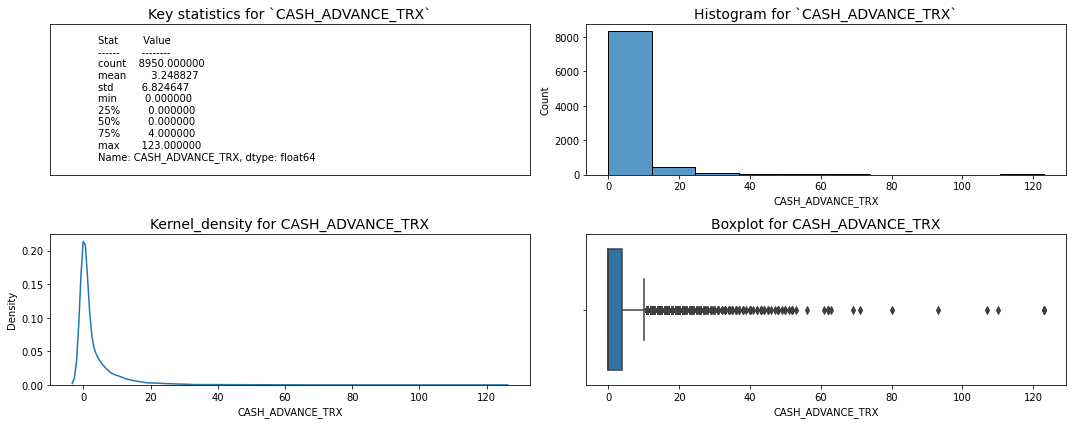

In [27]:
feature = creditcard_data.columns[10]
desc_stat = creditcard_data[feature].describe()
print(f'\nTHE 95TH PERCENTILE FOR {feature} FEATURE IS "{creditcard_data[feature].quantile(0.95):.2f}"\n')
fig, ax = plt.subplots(2,2, figsize = (15,6))
plt.subplot(2,2,1)
plt.text(.1,.1, f'Stat        Value\n------       --------\n{desc_stat}', fontsize = 10)
plt.title(f'Key statistics for `{feature}`', fontsize = 14)
plt.tick_params(left = False, bottom = False, labelleft = False, labelbottom = False)
plt.subplot(222)
sns.histplot(x = creditcard_data[feature], bins = 10)
plt.title(f'Histogram for `{feature}`', fontsize = 14)
plt.subplot(2,2,3)
sns.kdeplot(x=creditcard_data[feature])
plt.title(f'Kernel_density for {feature}', fontsize = 14)
plt.subplot(224)
sns.boxplot(x=creditcard_data[feature])
plt.title(f'Boxplot for {feature}', fontsize = 14)
plt.tight_layout()
plt.show()

In [28]:
# Checking the customers with more than 100 cash_advance_transactions
print(f"\033[1mCUSTOMER RECORD FOR CASH_ADVANCE_TRX GREATER THEN 100\033[0m")
creditcard_data[creditcard_data['CASH_ADVANCE_TRX'] >= 100].T

CUSTOMER RECORD FOR CASH_ADVANCE_TRX GREATER THEN 100


,542,1913,2159,3545,8315
BALANCE,1284.633140,1856.325339,10905.053810,4175.826879,2648.244646
BALANCE_FREQUENCY,1.000000,0.818182,1.000000,1.000000,1.000000
PURCHASES,55.500000,670.500000,431.930000,0.000000,0.000000
ONEOFF_PURCHASES,0.000000,516.900000,133.500000,0.000000,0.000000
INSTALLMENTS_PURCHASES,55.500000,153.600000,298.430000,0.000000,0.000000
CASH_ADVANCE,5406.459348,5603.126858,47137.211760,9968.184827,10458.978150
PURCHASES_FREQUENCY,0.083333,0.545455,0.583333,0.000000,0.000000
ONEOFF_PURCHASES_FREQUENCY,0.000000,0.272727,0.250000,0.000000,0.000000
PURCHASES_INSTALLMENTS_FREQUENCY,0.083333,0.363636,0.500000,0.000000,0.000000
CASH_ADVANCE_FREQUENCY,0.833333,0.727273,1.000000,0.909091,1.000000


**CASH_ADVANCE_TRX: Number of Transactions made with "Cash in Advance"**

Mejority of the customers have less than 10 transactions with cash_advance.

few customers have more than 100 transactions also note that any customer having transactions more than 10 is considered outlier. 

### FEATURE NAME: `'PURCHASES_TRX'`


THE 95TH PERCENTILE FOR PURCHASES_TRX FEATURE IS "57.00"



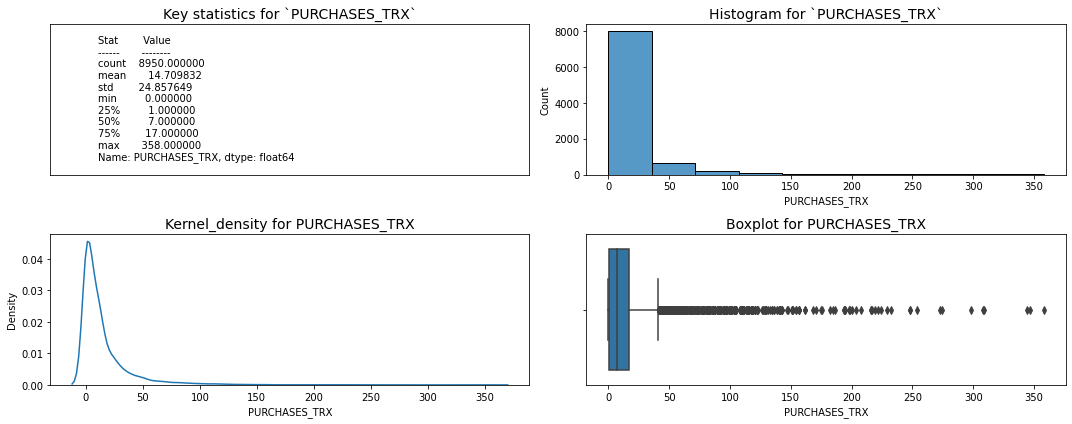

In [29]:
feature = creditcard_data.columns[11]
desc_stat = creditcard_data[feature].describe()
print(f'\nTHE 95TH PERCENTILE FOR {feature} FEATURE IS "{creditcard_data[feature].quantile(0.95):.2f}"\n')
fig, ax = plt.subplots(2,2, figsize = (15,6))
plt.subplot(2,2,1)
plt.text(.1,.1, f'Stat        Value\n------       --------\n{desc_stat}', fontsize = 10)
plt.title(f'Key statistics for `{feature}`', fontsize = 14)
plt.tick_params(left = False, bottom = False, labelleft = False, labelbottom = False)
plt.subplot(222)
sns.histplot(x = creditcard_data[feature], bins = 10)
plt.title(f'Histogram for `{feature}`', fontsize = 14)
plt.subplot(2,2,3)
sns.kdeplot(x=creditcard_data[feature])
plt.title(f'Kernel_density for {feature}', fontsize = 14)
plt.subplot(224)
sns.boxplot(x=creditcard_data[feature])
plt.title(f'Boxplot for {feature}', fontsize = 14)
plt.tight_layout()
plt.show()

In [30]:
# Checking customers with more than 300 purchase transactions
print(f"\033[1mCUSTOMER RECORD FOR PURCHASES_TRX ABOVE 300\033[0m")
creditcard_data[creditcard_data['PURCHASES_TRX'] >= 300].T

CUSTOMER RECORD FOR PURCHASES_TRX ABOVE 300


,1256,3181,3937,4515,4784
BALANCE,4010.621974,11631.323370,2997.977825,6956.376540,4929.758948
BALANCE_FREQUENCY,1.000000,1.000000,1.000000,1.000000,1.000000
PURCHASES,40040.710000,14686.100000,35131.160000,11500.940000,4939.100000
ONEOFF_PURCHASES,24543.520000,0.000000,34087.730000,3091.010000,4939.100000
INSTALLMENTS_PURCHASES,15497.190000,14686.100000,1043.430000,8409.930000,0.000000
CASH_ADVANCE,0.000000,3422.724703,0.000000,15133.532130,2365.843490
PURCHASES_FREQUENCY,1.000000,1.000000,1.000000,1.000000,0.666667
ONEOFF_PURCHASES_FREQUENCY,1.000000,0.000000,1.000000,1.000000,0.666667
PURCHASES_INSTALLMENTS_FREQUENCY,1.000000,1.000000,0.833333,1.000000,0.000000
CASH_ADVANCE_FREQUENCY,0.000000,0.083333,0.000000,1.000000,0.250000


**PURCHASES_TRX: Number of purchase transactions made**

Purchases transactions are also highly skewed like cashadvance trx

50 transactions seem to be normal and anything above looks like outlier or an exception. need to check with business.

### FEATURE NAME: `'CREDIT_LIMIT'`


THE 95TH PERCENTILE FOR CREDIT_LIMIT FEATURE IS "12000.00"



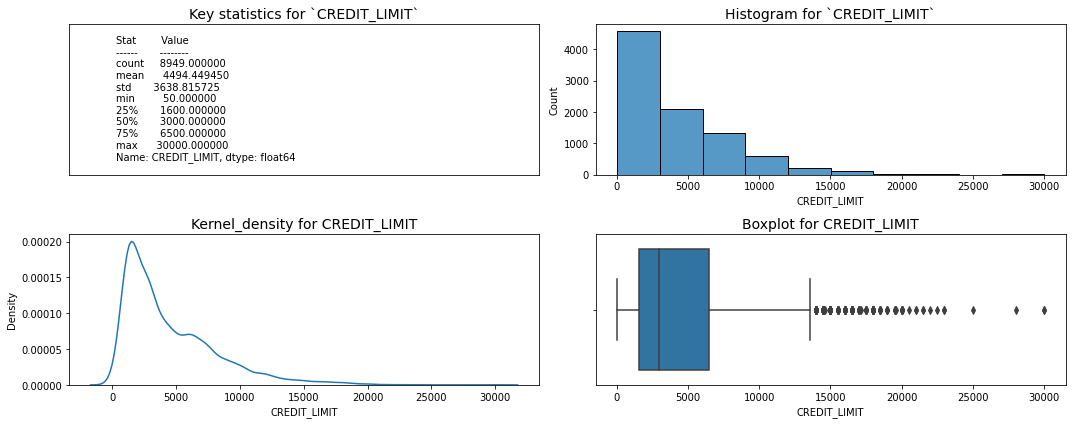

In [31]:
feature = creditcard_data.columns[12]
desc_stat = creditcard_data[feature].describe()
print(f'\nTHE 95TH PERCENTILE FOR {feature} FEATURE IS "{creditcard_data[feature].quantile(0.95):.2f}"\n')
fig, ax = plt.subplots(2,2, figsize = (15,6))
plt.subplot(2,2,1)
plt.text(.1,.1, f'Stat        Value\n------       --------\n{desc_stat}', fontsize = 10)
plt.title(f'Key statistics for `{feature}`', fontsize = 14)
plt.tick_params(left = False, bottom = False, labelleft = False, labelbottom = False)
plt.subplot(222)
sns.histplot(x = creditcard_data[feature], bins = 10)
plt.title(f'Histogram for `{feature}`', fontsize = 14)
plt.subplot(2,2,3)
sns.kdeplot(x=creditcard_data[feature])
plt.title(f'Kernel_density for {feature}', fontsize = 14)
plt.subplot(224)
sns.boxplot(x=creditcard_data[feature])
plt.title(f'Boxplot for {feature}', fontsize = 14)
plt.tight_layout()
plt.show()

In [32]:
# Checking customers with highest credit limit
max_lim=creditcard_data['CREDIT_LIMIT'].max()
print(f"\n\033[1mCUSTOMER RECORD FOR HIGHEST CREIDT LIMIT\033[0m")
creditcard_data[creditcard_data['CREDIT_LIMIT'] == max_lim].T


CUSTOMER RECORD FOR HIGHEST CREIDT LIMIT


,4905,7046
BALANCE,1409.256223,2980.054695
BALANCE_FREQUENCY,0.900000,0.818182
PURCHASES,4569.650000,26784.620000
ONEOFF_PURCHASES,1748.940000,26514.320000
INSTALLMENTS_PURCHASES,2820.710000,270.300000
CASH_ADVANCE,3883.517967,0.000000
PURCHASES_FREQUENCY,0.700000,0.583333
ONEOFF_PURCHASES_FREQUENCY,0.600000,0.500000
PURCHASES_INSTALLMENTS_FREQUENCY,0.600000,0.083333
CASH_ADVANCE_FREQUENCY,0.400000,0.000000


**CREDIT_LIMIT: Limit of Credit Card for user**

95% of customers have $12000 or less credit limit. 

Credit limit is also positively skewed. max credit limt being $30000

We have two customers with credit limit of $30000


THE 95TH PERCENTILE FOR PAYMENTS FEATURE IS "6082.09"



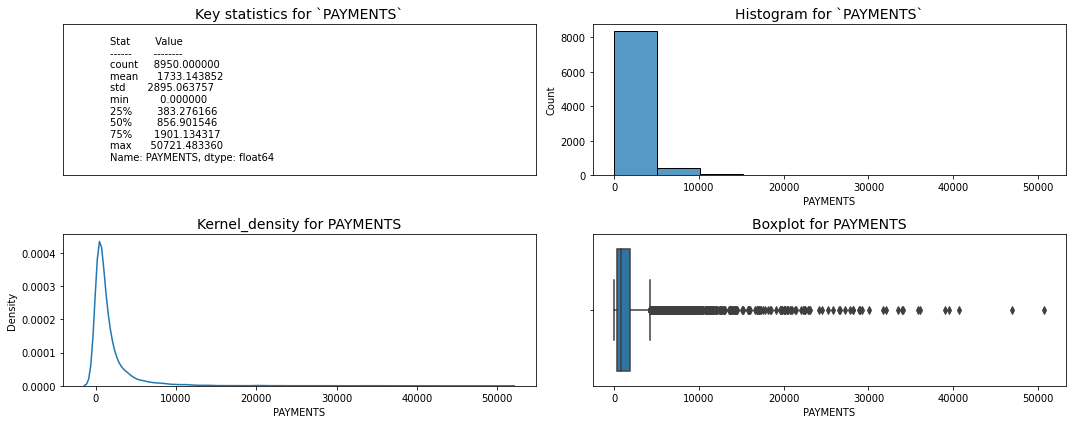

In [33]:
feature = creditcard_data.columns[13]
desc_stat = creditcard_data[feature].describe()
print(f'\nTHE 95TH PERCENTILE FOR {feature} FEATURE IS "{creditcard_data[feature].quantile(0.95):.2f}"\n')
fig, ax = plt.subplots(2,2, figsize = (15,6))
plt.subplot(2,2,1)
plt.text(.1,.1, f'Stat        Value\n------       --------\n{desc_stat}', fontsize = 10)
plt.title(f'Key statistics for `{feature}`', fontsize = 14)
plt.tick_params(left = False, bottom = False, labelleft = False, labelbottom = False)
plt.subplot(222)
sns.histplot(x = creditcard_data[feature], bins = 10)
plt.title(f'Histogram for `{feature}`', fontsize = 14)
plt.subplot(2,2,3)
sns.kdeplot(x=creditcard_data[feature])
plt.title(f'Kernel_density for {feature}', fontsize = 14)
plt.subplot(224)
sns.boxplot(x=creditcard_data[feature])
plt.title(f'Boxplot for {feature}', fontsize = 14)
plt.tight_layout()
plt.show()

In [34]:
# Checking customer with highrest payments
max_pay=creditcard_data['PAYMENTS'].max()
print(f"\033[1mCUSTOMER RECORD FOR HIGHEST PAYMENT\033[0m")
creditcard_data[creditcard_data['PAYMENTS'] == max_pay].T

CUSTOMER RECORD FOR HIGHEST PAYMENT


,4220
BALANCE,1268.809031
BALANCE_FREQUENCY,0.272727
PURCHASES,17945.000000
ONEOFF_PURCHASES,17945.000000
INSTALLMENTS_PURCHASES,0.000000
CASH_ADVANCE,0.000000
PURCHASES_FREQUENCY,0.166667
ONEOFF_PURCHASES_FREQUENCY,0.166667
PURCHASES_INSTALLMENTS_FREQUENCY,0.000000
CASH_ADVANCE_FREQUENCY,0.000000


**PAYMENTS: Amount of Payment done by user***

95% of our customer made payments of about 
USD6083 in the last six months. Only 5 percent, rougly about 450 customers, made payment more than $6083 in last six months. It could be oneoff payments in the last six months. may be marriage, of special occasion, house renovations, education, travel during last 6 months etc. 


THE 95TH PERCENTILE FOR MINIMUM_PAYMENTS FEATURE IS "2766.56"



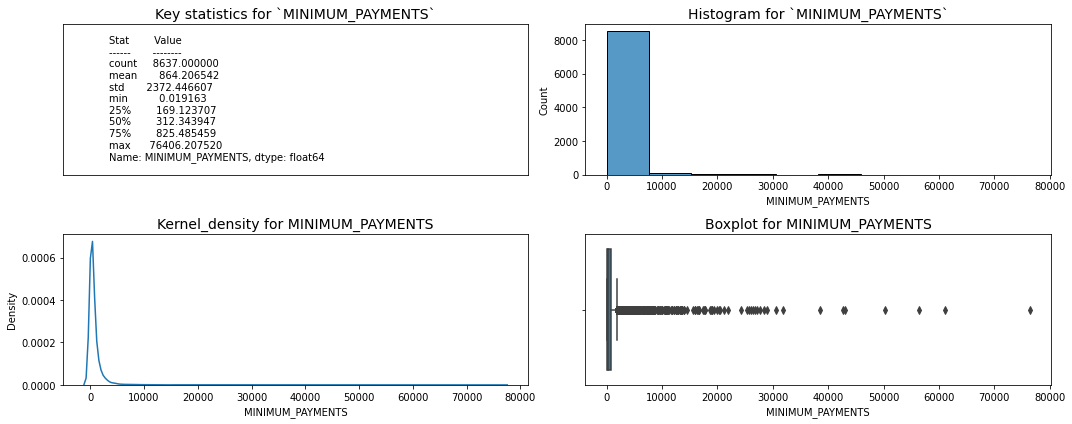

In [35]:
feature = creditcard_data.columns[14]
desc_stat = creditcard_data[feature].describe()
print(f'\nTHE 95TH PERCENTILE FOR {feature} FEATURE IS "{creditcard_data[feature].quantile(0.95):.2f}"\n')
fig, ax = plt.subplots(2,2, figsize = (15,6))
plt.subplot(2,2,1)
plt.text(.1,.1, f'Stat        Value\n------       --------\n{desc_stat}', fontsize = 10)
plt.title(f'Key statistics for `{feature}`', fontsize = 14)
plt.tick_params(left = False, bottom = False, labelleft = False, labelbottom = False)
plt.subplot(222)
sns.histplot(x = creditcard_data[feature], bins = 10)
plt.title(f'Histogram for `{feature}`', fontsize = 14)
plt.subplot(2,2,3)
sns.kdeplot(x=creditcard_data[feature])
plt.title(f'Kernel_density for {feature}', fontsize = 14)
plt.subplot(224)
sns.boxplot(x=creditcard_data[feature])
plt.title(f'Boxplot for {feature}', fontsize = 14)
plt.tight_layout()
plt.show()

In [36]:
# Verifying the customer who paid $76000 as his minimum payment
print(f"\n\033[4m\033[01m{str.upper('Customer record for the customer who paid 76000 as his minimum payment')}\033[0m\n")
max_pay=creditcard_data['MINIMUM_PAYMENTS'].max()
creditcard_data[creditcard_data['MINIMUM_PAYMENTS']==max_pay].T


CUSTOMER RECORD FOR THE CUSTOMER WHO PAID 76000 AS HIS MINIMUM PAYMENT



,4376
BALANCE,10571.411070
BALANCE_FREQUENCY,1.000000
PURCHASES,7739.480000
ONEOFF_PURCHASES,0.000000
INSTALLMENTS_PURCHASES,7739.480000
CASH_ADVANCE,0.000000
PURCHASES_FREQUENCY,1.000000
ONEOFF_PURCHASES_FREQUENCY,0.000000
PURCHASES_INSTALLMENTS_FREQUENCY,1.000000
CASH_ADVANCE_FREQUENCY,0.000000


**MINIMUM_PAYMENTS: Minimum amount of payments made by user**

Mejority of the customers made less than 1000 as their minimum payments. 

Thre is one customer who made 76000 minimum payment which more than the max purchases and the total payments for any customer. It is better to check with the business about the validity of such transaction.

When we investigate further we note that `BALANCE` is more than `CREDIT_LIMIT` & `MINIMUM_PAYMENTS` is more than `PURCHASES` & `PAYMENTS`. it is better to remove this record.


THE 95TH PERCENTILE FOR PRC_FULL_PAYMENT FEATURE IS "1.00"



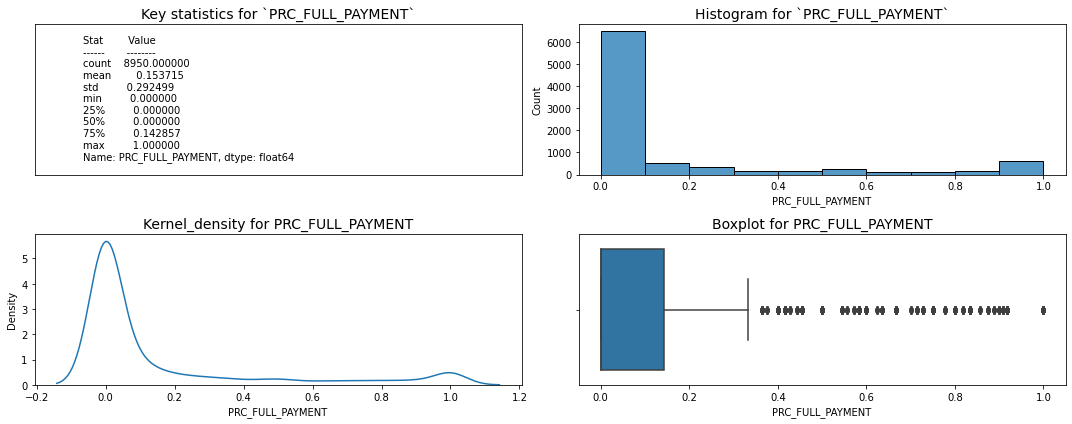



No of customers who make full payment :- 488


In [37]:
feature = creditcard_data.columns[15]
desc_stat = creditcard_data[feature].describe()
print(f'\nTHE 95TH PERCENTILE FOR {feature} FEATURE IS "{creditcard_data[feature].quantile(0.95):.2f}"\n')
fig, ax = plt.subplots(2,2, figsize = (15,6))
plt.subplot(2,2,1)
plt.text(.1,.1, f'Stat        Value\n------       --------\n{desc_stat}', fontsize = 10)
plt.title(f'Key statistics for `{feature}`', fontsize = 14)
plt.tick_params(left = False, bottom = False, labelleft = False, labelbottom = False)
plt.subplot(222)
sns.histplot(x = creditcard_data[feature], bins = 10)
plt.title(f'Histogram for `{feature}`', fontsize = 14)
plt.subplot(2,2,3)
sns.kdeplot(x=creditcard_data[feature])
plt.title(f'Kernel_density for {feature}', fontsize = 14)
plt.subplot(224)
sns.boxplot(x=creditcard_data[feature])
plt.title(f'Boxplot for {feature}', fontsize = 14)
plt.tight_layout()
plt.show()
print(f'\n\nNo of customers who make full payment :- {len(creditcard_data[creditcard_data["PRC_FULL_PAYMENT"] == 1])}')

**PRC_FULL_PAYMENT: Percent of full payment paid by user**

Mejority of the customers don't make full payment, which is one of the sources of income for the bank as they can charge interest on the outstanding balance.

only about 488 customers who make 100 percent payment.

Atleast 75% of our customers make full payments less than 14% of the times.


THE 95TH PERCENTILE FOR TENURE FEATURE IS "12.00"



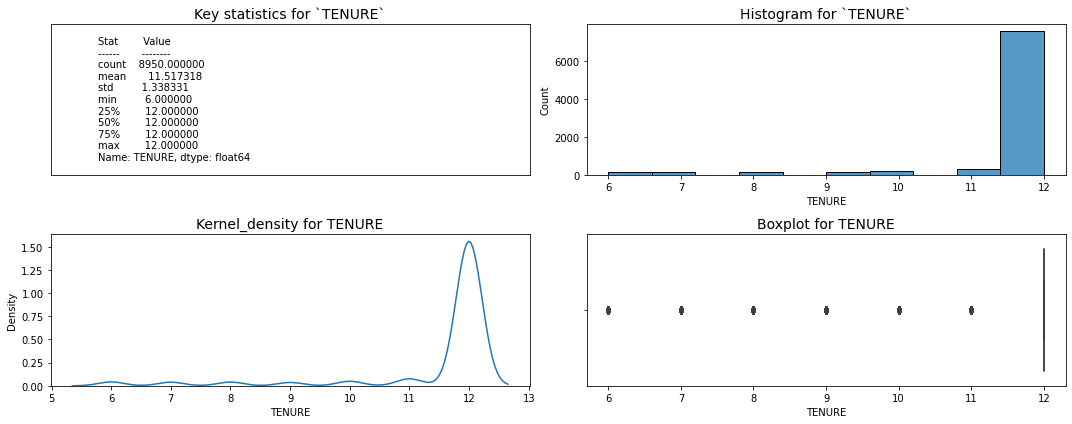



Number of customer whoes "Tenure" is less then 12 years :- 1366


In [38]:
feature = creditcard_data.columns[16]
desc_stat = creditcard_data[feature].describe()
print(f'\nTHE 95TH PERCENTILE FOR {feature} FEATURE IS "{creditcard_data[feature].quantile(0.95):.2f}"\n')
fig, ax = plt.subplots(2,2, figsize = (15,6))
plt.subplot(2,2,1)
plt.text(.1,.1, f'Stat        Value\n------       --------\n{desc_stat}', fontsize = 10)
plt.title(f'Key statistics for `{feature}`', fontsize = 14)
plt.tick_params(left = False, bottom = False, labelleft = False, labelbottom = False)
plt.subplot(222)
sns.histplot(x = creditcard_data[feature], bins = 10)
plt.title(f'Histogram for `{feature}`', fontsize = 14)
plt.subplot(2,2,3)
sns.kdeplot(x=creditcard_data[feature])
plt.title(f'Kernel_density for {feature}', fontsize = 14)
plt.subplot(224)
sns.boxplot(x=creditcard_data[feature])
plt.title(f'Boxplot for {feature}', fontsize = 14)
plt.tight_layout()
plt.show()
print(f'\n\nNumber of customer whoes "Tenure" is less then 12 years :- {len(creditcard_data[creditcard_data["TENURE"] < 12])}')

In [39]:
# let us check the no of customers for each years
print(f'Number of customer for every year in "TENURE"\n\nyrs   no. of cust')
creditcard_data['TENURE'].value_counts()

Number of customer for every year in "TENURE"

yrs   no. of cust


12    7584
11     365
10     236
6      204
8      196
7      190
9      175
Name: TENURE, dtype: int64

**TENURE: Tenure of credit card service for user**

Mejority of the customers are 12 years old and loyal customers.

minumum tenure of the customer is 6 years.

# BIVARIATE analysis

Checking the correlation is the best way to check the relationship between two features. **However, note that only leniar relationship is measures in correlation** For non leniar relationship we can use Visualisation techniques such as scatter plots. also we can check PPSCORE using PPSCORE library. 

**HOWEVER, FOR CUSTOMER SEGMENTATION (ESPECIALY IN UNSUPERVISED LEARNING) WE DONT USE CORRELATION. AS THERE IS NOTHING TO BE PREDICTED. BUT WE WILL USE DIMENTINALITY REDUCTION TO VISUALIZE THE ENTIRE DATA**

We will apply PCA or T-SNE  techniques to visualise the data in entirity. We will do that in multivariate analysis

### CORRELATION

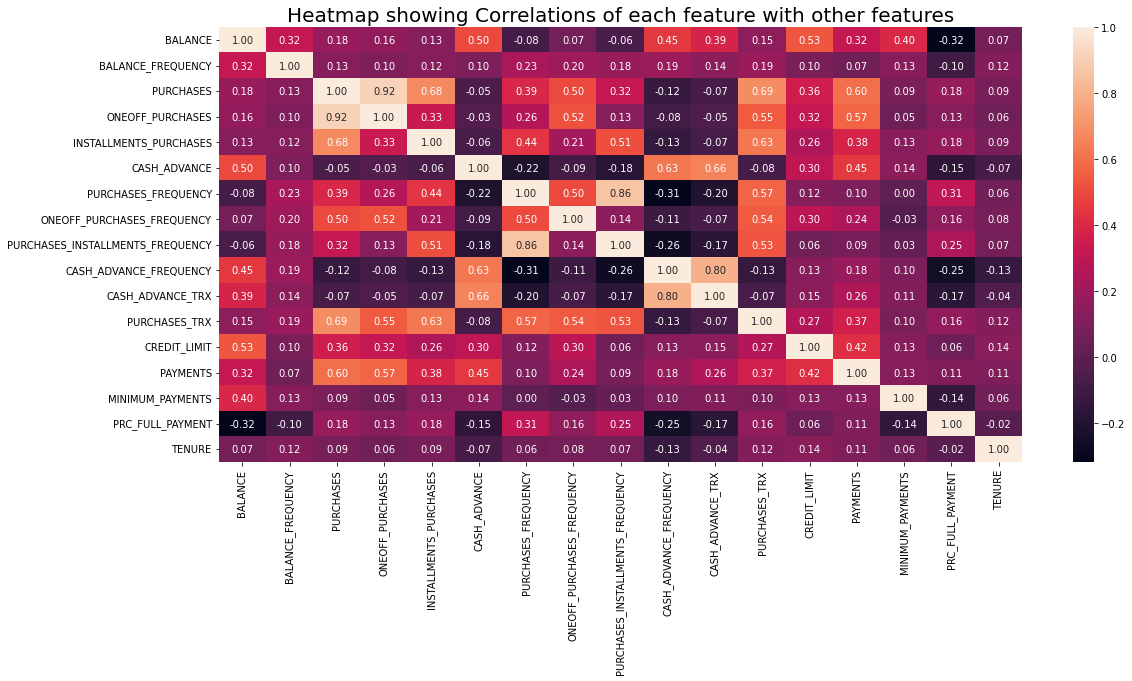

In [40]:
correlations = creditcard_data.corr()
plt.figure(figsize=(18,8))
sns.heatmap(correlations, annot = True, fmt = ".2f")
plt.title('Heatmap showing Correlations of each feature with other features', fontsize = 20)
plt.show()

### MULTIVARIATE ANALYSIS - PCA & T-SNE

### IMPUTING THE NULL VALUES

Since our data contains 'NaN' Values we need to first impute the values inplace of 'NaN' Values, before fitting PCA on the data. Let us Revist the NULL values and identify the best values to impute.

As noted above we have null values in two features 
* CREDIT_LIMIT :- ONE NULL VALUE
**AS WE ALREADY KNOW THAT `'CREDIT_LIMIT'` FEATURE IS POSITIVELY SKEWED `IT IS BETTER TO USE MEDIAN TO IMPUTE NULL VALUES` AS MEDIAN IS MORE ROBUST MEASURE MEANING IS NOT AFFECTED BY OUTLIERS. SO, LET'S IMPUTE MEDIAN FOR `'CREDIT_LIMIT'` FEATURE.**
* MINIMUM_PAYMENTS :- 313 NULL VALUES
**LET'S VERIFY FURTHER FOR MINIMUM PAYMENTS, AS IN MY OPINION IT HAS SOME RELATION WITH `'PAYMENTS'` AND `'FULL_PAYMENT'` FEATURES. ALSO IN OUR STUDY OF `'BALANCE_FREQUENCY'` WE NOTED THAT `'MINIMUM_PAYMENT' IS NILL` WHILE `'PAYMENTS' AND 'FULL_PAYMENTS' ARE 0` LET'S CHECK IN DETAIL

In [41]:
# Imputing credit_limit featue with median
creditcard_data[creditcard_data["CREDIT_LIMIT"].isnull() == True] = creditcard_data['CREDIT_LIMIT'].median()
creditcard_data['CREDIT_LIMIT'].isnull().sum()

0

In [42]:
# calling describe method on 'null' filtered data
print('\n\033[1m\033[4m*********KEY STATISTICS ON "NULL" FILTERED DATA**********\033[0m\n')
creditcard_data[creditcard_data['MINIMUM_PAYMENTS'].isnull()].describe().T


*********KEY STATISTICS ON "NULL" FILTERED DATA**********



,count,mean,std,min,25%,50%,75%,max
BALANCE,313.0,555.441321,1292.687887,0.0,0.187069,16.848358,286.686616,9164.724752
BALANCE_FREQUENCY,313.0,0.389403,0.408341,0.0,0.090909,0.181818,1.000000,1.000000
PURCHASES,313.0,393.087284,757.905701,0.0,1.400000,130.400000,399.950000,7597.090000
ONEOFF_PURCHASES,313.0,250.433387,624.453991,0.0,0.000000,0.000000,176.030000,6761.290000
INSTALLMENTS_PURCHASES,313.0,142.653898,311.289043,0.0,0.000000,0.000000,152.280000,2959.240000
CASH_ADVANCE,313.0,559.136698,1185.132567,0.0,0.000000,0.000000,480.104401,7616.064965
PURCHASES_FREQUENCY,313.0,0.336043,0.372517,0.0,0.083333,0.166667,0.583333,1.000000
ONEOFF_PURCHASES_FREQUENCY,313.0,0.107886,0.227370,0.0,0.000000,0.000000,0.083333,1.000000
PURCHASES_INSTALLMENTS_FREQUENCY,313.0,0.244670,0.359756,0.0,0.000000,0.000000,0.416667,1.000000
CASH_ADVANCE_FREQUENCY,313.0,0.067169,0.130087,0.0,0.000000,0.000000,0.083333,1.000000


In [43]:
# Recalling the describe method on selected feature to compare it with 'null' filtered data
print('\n\033[1m\033[4m*********KEY STATISTICS ON SELECTED FEATURES FOR FULL DATA**********\033[0m\n')
creditcard_data.loc[:,['PAYMENTS','MINIMUM_PAYMENTS','PRC_FULL_PAYMENT']].describe().T


*********KEY STATISTICS ON SELECTED FEATURES FOR FULL DATA**********



,count,mean,std,min,25%,50%,75%,max
PAYMENTS,8950.0,1733.478037,2895.037344,0.000000,383.315761,857.298191,1902.779562,50721.48336
MINIMUM_PAYMENTS,8637.0,864.552216,2372.540278,0.019163,169.176825,312.560636,825.529474,76406.20752
PRC_FULL_PAYMENT,8950.0,0.488910,31.710709,0.000000,0.000000,0.000000,0.142857,3000.00000


In [44]:
# Checking the top 25 rows for selected features
print('\n\033[1m\033[4m*********TOP 25 RECORDS OF "NULL" FILTERED DATA**********\033[0m\n')
creditcard_data.loc[creditcard_data['MINIMUM_PAYMENTS'].isnull(),['PAYMENTS','MINIMUM_PAYMENTS','PRC_FULL_PAYMENT']].head(25)


*********TOP 25 RECORDS OF "NULL" FILTERED DATA**********



,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
3,0.000000,NaN,0.0
45,0.000000,NaN,0.0
47,0.000000,NaN,0.0
54,417.016763,NaN,0.0
55,0.000000,NaN,0.0
56,0.000000,NaN,0.0
63,0.000000,NaN,0.0
93,0.000000,NaN,0.0
94,0.000000,NaN,0.0
97,0.000000,NaN,0.0


*WE CAN NOTE THAT, 75% OF 313 NULL VLAUES HAVE `PAYMENTS` AS `ZERO` AND ONLY `73` RECORDS HAVE PAYMENTS GREATER THAN `ZERO`*

**AFTER STUDYING THE 'NULL' VALUES IN `'MINIMUM_PAYMNTS'` FEATURE I THINK IT IS IDEAL TO IMPUTE `'ZERO'` WHERE `'PAYMENTS'` IS `'ZERO'` ELSE IMPUTE MEDIAN OF `'MINIMUM_PAYMENTS'`**

In [45]:
# Imputing the 'null' values in minimum payments feature as discussed above
imputed_creditcard_data = creditcard_data.copy(deep = True) # copying the data in new dataframe
imputed_creditcard_data.loc[imputed_creditcard_data["PAYMENTS"] == 0, ['MINIMUM_PAYMENTS']] = 0 # imputing null values with zero if payments in zero 
imputed_creditcard_data.loc[~(imputed_creditcard_data["PAYMENTS"] == 0) & (imputed_creditcard_data['MINIMUM_PAYMENTS'].isnull()), ['MINIMUM_PAYMENTS']] = imputed_creditcard_data['MINIMUM_PAYMENTS'].median() #else median
imputed_creditcard_data.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

### SCALLING THE DATA

In [46]:
# Scale the data for PCA (it is important that we scale and center the data for applying PCA)
stdscaler = StandardScaler()
stdscaler.fit(imputed_creditcard_data)
scaled_creditcard_data = stdscaler.transform(imputed_creditcard_data)
scaled_creditcard_data[:3,:]

array([[-0.73215254, -0.01243708, -0.42504112, -0.35709655, -0.34929364,
        -0.46691494, -0.02078052, -0.01695614, -0.01943682, -0.01483269,
        -0.11060886, -0.32476388, -0.9603784 , -0.52909906, -0.29855943,
        -0.01541869,  0.00468616],
       [ 0.78680415, -0.00956936, -0.46969164, -0.35709655, -0.454744  ,
         2.60534021, -0.02603707, -0.01695614, -0.02206497, -0.00694835,
         0.01284161, -0.37455509,  0.68867844,  0.81853416,  0.10089735,
        -0.0084105 ,  0.00468616],
       [ 0.44697698, -0.00670164, -0.10782119,  0.10867457, -0.454744  ,
        -0.46691494,  0.00550214,  0.01458117, -0.02206497, -0.01483269,
        -0.11060886, -0.07580782,  0.82609984, -0.38392368, -0.08968435,
        -0.01541869,  0.00468616]])

### PRINCIPAL COMPONENT ANALYSIS (PCA)

*APPLY  PRINCIPAL COMPONENT ANALYSIS (PCA) AND VISUALIZE THE THE DATA

In [47]:
# Apply PCA on the data we can select n_components but we are not using the same
pca = PCA()
pca.fit(scaled_creditcard_data)
components = pca.transform(scaled_creditcard_data)
components[:3,:]

array([[-2.35969344e-01, -1.40976512e+00, -6.28256837e-01,
         1.02589780e-03,  3.65670238e-01,  6.50157533e-02,
        -8.52370743e-02,  4.71632235e-02,  8.77319488e-02,
        -3.92014945e-02, -2.36338232e-02,  5.19796784e-03,
        -1.85421375e-03,  2.70110851e-03,  2.14567151e-04,
        -1.11556916e-04, -2.04547520e-04],
       [-1.02506804e-01,  6.50785440e-01,  2.56065621e+00,
        -1.14863834e+00,  4.69808606e-01,  5.75071883e-01,
         9.83447444e-02, -5.32463072e-01,  5.98444819e-02,
        -3.14797997e-01, -2.49362679e-02,  7.81554894e-03,
         5.19072596e-03,  2.96295963e-03,  1.33214184e-03,
        -5.30141116e-05, -9.18462331e-04],
       [-8.12557669e-02, -1.58366378e-02,  2.34167215e-01,
         4.78011410e-02, -8.38369506e-01, -8.48758511e-01,
         7.62733984e-02,  9.76739778e-02, -1.92932198e-02,
        -3.73691332e-02, -3.32706357e-03,  4.12208968e-03,
        -1.75676822e-02, -1.95024275e-02,  6.80401672e-03,
         3.79545955e-04,  5.0


EXPLAINED VARIANCE FOR ALL FEATURES IN PERCENTAGE 
[50.74 19.96 10.74  5.88  4.16  3.89  2.27  1.36  0.88  0.12  0.01  0.
  0.    0.    0.    0.    0.  ]



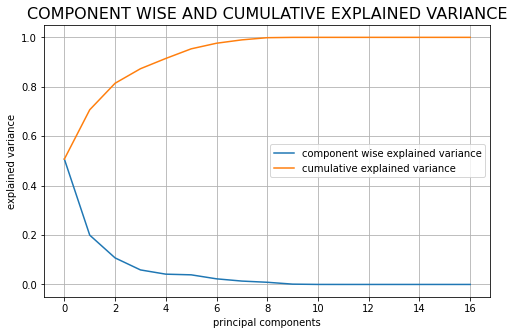



**WE CAN SEE THAT 70% OF THE INFORMATION IS RETAINED BY TWO PRINCIPAL COMPONENTS AND 75% IS RETAINED BY 3 PRINCIPAL COMPONENTS 



In [48]:
# Checking the explained variance to see how much information is retained by 2 or 3 principle components for visualisation
np.set_printoptions(precision = 2, suppress = True)
print(f'\n\033[1m\033[4mEXPLAINED VARIANCE FOR ALL FEATURES IN PERCENTAGE \n{pca.explained_variance_ratio_ * 100}\033[0m\n')
plt.figure(figsize = (8,5))
plt.plot(pca.explained_variance_ratio_, label = 'component wise explained variance')
plt.plot(np.cumsum(pca.explained_variance_ratio_), label = 'cumulative explained variance')
plt.title('COMPONENT WISE AND CUMULATIVE EXPLAINED VARIANCE', fontsize = 16)
plt.xlabel('principal components')
plt.ylabel('explained variance')
plt.grid(which ='both')
plt.legend()
plt.show()
print('\n\n\033[1m**WE CAN SEE THAT 70% OF THE INFORMATION IS RETAINED BY TWO PRINCIPAL COMPONENTS AND 75% IS RETAINED BY 3 PRINCIPAL COMPONENTS \033[0m\n')

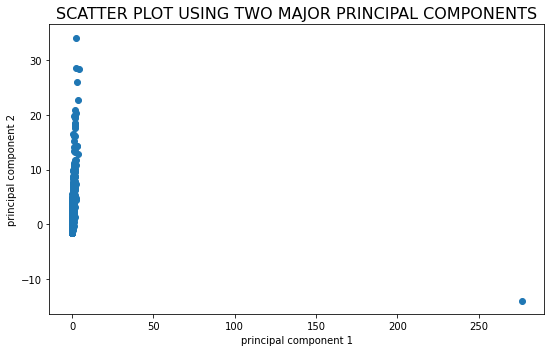

In [49]:
# plotting the two principal components with 70% information for visualisation
plt.figure(figsize = (8,5))
plt.scatter(x = components[:,0], y = components[:,1])
plt.title('SCATTER PLOT USING TWO MAJOR PRINCIPAL COMPONENTS', fontsize = 16)
plt.xlabel('principal component 1')
plt.ylabel('principal component 2')
plt.tight_layout()
plt.show()

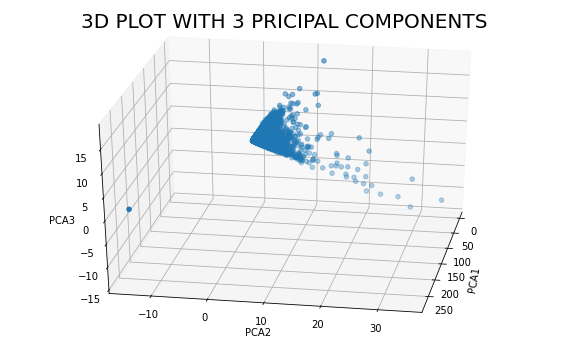

In [50]:
from mpl_toolkits import mplot3d
fig = plt.figure(figsize=(8,5))
ax = plt.axes(projection = '3d')
ax.view_init(30,10)
ax.scatter3D(xs = components[:,0], ys = components[:,1], zs = components[:,2],)
ax.set_xlabel('PCA1', rotation = 80)
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')
ax.set_title('3D PLOT WITH 3 PRICIPAL COMPONENTS', fontsize = 20)
plt.tight_layout()
plt.show()

**We can clearly see two clusters in `3D` plot. `2D` plot is not much helpful. There are some points which seem to be far away from the mejority of the data. may be they are exeptions.**

### t-DISTRIBUTED STOCASTIC NEIGHBOURHOOD EMBEDDING (T-SNE)

* T-SNE IS MAJORLY USED TO VISUALISE THE DATA WE CAN NOT USE IT FOR MODEL BUILDING AS IT IS STOCASTIC AND THE OUTPUT VALUES CHANGE EVERY TIME WE RUN THE ALGORITHM

In [51]:
# Applying t-sne on the data
from sklearn.manifold import TSNE
embedded_data = TSNE(n_components=2,learning_rate='auto',init='random').fit_transform(scaled_creditcard_data)
embedded_data.shape

(8950, 2)

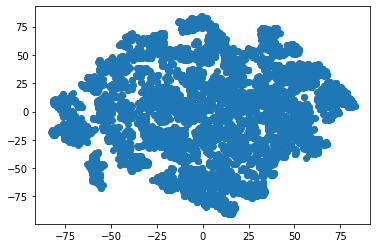

In [52]:
plt.scatter(x = embedded_data[:,0], y = embedded_data[:,1])

In [53]:
from sklearn.manifold import TSNE
embedded_data = TSNE(n_components=3,learning_rate='auto',init='random').fit_transform(scaled_creditcard_data)
embedded_data.shape

(8950, 3)

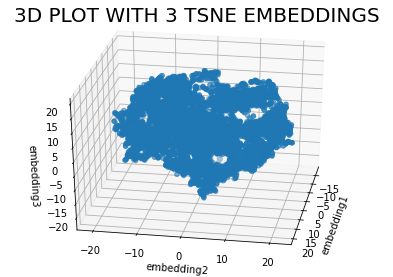

In [54]:
fig = plt.figure(figsize=(6,4))
ax = plt.axes(projection = '3d')
ax.view_init(30,10)
ax.scatter3D(xs = embedded_data[:,0], ys = embedded_data[:,1], zs = embedded_data[:,2])
ax.set_xlabel('embedding1', rotation = 80)
ax.set_ylabel('embedding2')
ax.set_zlabel('embedding3')
ax.set_title('3D PLOT WITH 3 TSNE EMBEDDINGS', fontsize = 20)
plt.tight_layout()
plt.show()

**THE TSNE PLOTS SHOW THAT MOST OF THE DATAPOINTS ARE GROUPED TOGETHER AND ONLY A SMALL NUMBER OF DATAPOINTS ARE DISTINCTLY SEPARABLE. HOWEVER, THE DATAPOINTS ARE WELL SPREAD SO WE CAN APPLY CLUSTERING TECHNIQUES TO SEGMENT THE CUSTOMER DATA. THE `2D` PLOT SHOWS THAT THERE COULD MANY CLUSTERS POSSIBLE IN THE DATA.**

**WE WILL APPLY `KMEANS CLUSTER` TO SEGMENT OUR DATA. HOWEVER, BEFORE APPLYING KMEANS LET APPLY DBSCAN AND SEE IF THERE ARE ANY ANOMALLIES IN THE DATASET.**

*NOTE: `DBSCAN ALGORITHM` CAN BE USE FOR CLUSTERING ALSO. HOWEVER, IT IS MOSTLY USED FOR ANOMALY DETECTION AS IT WILL CATEGORIZE DATAPOINTS THAT DO NOT FIT INTO ANY CLUSTERS AS ANOMALIES BY MARKING THEM `-1`.*

In [55]:
# Anomally detection using DBSCAN
from sklearn.cluster import DBSCAN
dbcluster = DBSCAN(eps=.3, min_samples = 5).fit(scaled_creditcard_data)
print(f'\nCLUSTERS CREATED BY DBSCAN WITH LOWER EPSILON AND LOWER MIN POINTS, "-1" STANDS FOR ANOMALIES\n{pd.Series(dbcluster.labels_).value_counts()}')
dbcluster = DBSCAN(eps=1.9, min_samples = 15).fit(scaled_creditcard_data)
print(f'\nCLUSTERS CREATED BY DBSCAN WITH HIGHER EPSILON AND HIGHER MIN POINTS, "-1" STANDS FOR ANOMALIES\n{pd.Series(dbcluster.labels_).value_counts()}')


CLUSTERS CREATED BY DBSCAN WITH LOWER EPSILON AND LOWER MIN POINTS, "-1" STANDS FOR ANOMALIES
 0     4495
-1     4266
 4       33
 9       21
 3       15
 16      13
 5       10
 18      10
 8        9
 15       9
 13       8
 2        7
 11       7
 19       6
 17       6
 1        6
 14       6
 7        5
 20       5
 10       5
 6        5
 12       3
dtype: int64

CLUSTERS CREATED BY DBSCAN WITH HIGHER EPSILON AND HIGHER MIN POINTS, "-1" STANDS FOR ANOMALIES
 0    8648
-1     302
dtype: int64


**FOR VARIOUS VALUES OF EPSILON AND MIN_SAMPLES NUMBER OF ANOMALIES RANGE FROM APPROX `4000 TO 261`. IDEALLY THESE ANOMALIES ARE NOT IDEAL FIT FOR ANY CLUSTERS. LET'S GO AHEAD AND APPLY `KMEANS ALGORITHM` TO MAKE CLUSTERS.**

*NOTE: `KMEANS` WILL NOT LABLE ANY DATAPOINT AS ANOMALY. IT WILL TRY TO FIT ALL THE DATAPOINTS INTO ONE OF THE CLUSTERS*

***We need to check the ideal number of cluster for kmeans as no of clusters is one of the hyper parameter of the `kmeans` algorithm. let us check the same by running `kmeans` for various values for clusters. Business would look for manageble no of clusters, general accepted number is 10 clusters. for our experimentlet's check for 20 clusters.***


WITHIN CLUSTER SUM OF SQUARES:
[152149.99999999977, 75431.54228165594, 59125.76882465489, 49277.50809618052, 42529.376279800366, 37992.14323698792, 34445.718972218325, 31376.533209380344, 29357.624970187662, 27594.11340450069, 25926.87524584335, 24478.739363191264, 23420.144428221563, 22523.882472314224, 21714.852677166506, 21046.74481600169, 20200.588973134283, 19701.20414658793, 19067.645286785464, 18515.35584247768]



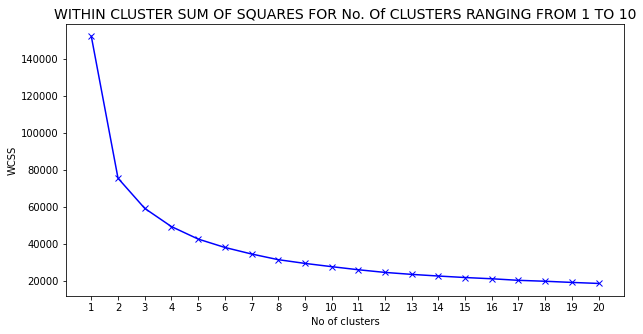

In [56]:
# Checking the ideal number of clusters for the data set

WCSS = []
for i in range(1,21):
  KMEANS = KMeans(n_clusters = i).fit(scaled_creditcard_data)
  WCSS.append(KMEANS.inertia_)

print(f'\nWITHIN CLUSTER SUM OF SQUARES:\n{WCSS}\n')


# Plotting the WCSS to see the ideal number of clusters
plt.figure(figsize = (10,5))
plt.title(f'WITHIN CLUSTER SUM OF SQUARES FOR No. Of CLUSTERS RANGING FROM 1 TO 10', fontsize = 14)
plt.plot(range(1,21),WCSS, 'bx-')
plt.xticks([i for i in range(1,21)],[i for i in range(1,21)])
plt.xlabel('No of clusters')
plt.ylabel('WCSS')
plt.show()

The slope of WCSS curve is decreasing gradually after no of clusters exceeds 2, 2 clusters make no sense. and looking at the curve let us make 4 or 5 clusters and see which one suits better.

Ideally, The WCSS curve should flatten at one specific point indicating that there is no gain in making futher clusters, sharper the bend the better it is, generally speaking it looks like an elbow, hence the plot also is called elbow curve. hence the ideal number of clusters should be the point where the curve is completely flat. There is no clear winner for the number of clusters. 

The decision about number of is better taken in cusultation with business or profiling the clusters once clusters are identified by the algorithm. if clusters are distinctly identifiable we can leave it at that. other wise we can opt for few large clusters and then subdivide the large clusters into sub cluster. 

In reality mostly on first level 2 or 3 clusters will be very large clusters and you will be able to make couple of cluster such that they don't need futher division.

In [57]:
# Applying Kmeans with 4 clusters
KMEANS = KMeans(n_clusters=4, max_iter=500).fit(scaled_creditcard_data)
KMEANS_labels = pd.Series(KMEANS.labels_, name='CLUSTERS')
KMEANS_labels.value_counts()

0    7340
2    1343
3     266
1       1
Name: CLUSTERS, dtype: int64

If we note closely there is one cluster with more than 7000 records and there is one cluster with only singel record. There is something off with that record. let's check find that record and verify.

In [58]:
cluster_centers = pd.DataFrame(KMEANS.cluster_centers_, columns=[creditcard_data.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.335101,-0.011177,-0.138370,-0.124584,-0.098595,-0.254348,-0.010573,-0.011181,-0.010615,-0.011724,-0.047980,-0.079400,-0.273946,-0.222133,-0.150515,-0.010098,-0.011723
1,0.689530,94.596516,0.934413,1.450156,2.861305,0.963606,94.591576,94.594968,94.591724,94.597270,92.477241,74.312263,-0.410693,0.437505,0.926360,94.595130,94.514530
2,1.619690,-0.007893,-0.038230,-0.015914,-0.061717,1.410109,-0.013310,-0.010500,-0.012846,-0.003883,0.200476,-0.022532,1.176684,0.702677,0.706869,-0.014159,-0.006972
3,1.066575,-0.007360,4.007696,3.512657,3.021476,-0.104611,0.003354,0.005918,0.002169,-0.012501,-0.035889,2.025344,1.619889,2.580162,0.580945,-0.005491,0.003378


In [59]:
# Inorder to understand these number let's inverse_transform the scaled data to original values.
cluster_centers = stdscaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(cluster_centers, columns = [creditcard_data.columns])
# pd.set_option('chop_threshold',0)
# pd.DataFrame(cluster_centers.style.format('{0:.2f}', na_rep='MISS'), columns=[cluster_centers.columns])
cluster_centers.T

,0,1,2,3
BALANCE,867.326416,3000.0,4936.040665,3784.784974
BALANCE_FREQUENCY,0.858132,3000.0,0.962226,0.979118
PURCHASES,707.898771,3000.0,921.858086,9566.356654
ONEOFF_PURCHASES,385.966206,3000.0,566.356165,6423.707481
INSTALLMENTS_PURCHASES,322.204729,3000.0,355.568153,3144.904812
CASH_ADVANCE,445.782518,3000.0,3936.380278,759.801532
PURCHASES_FREQUENCY,0.490299,3000.0,0.403544,0.931898
ONEOFF_PURCHASES_FREQUENCY,0.183124,3000.0,0.204719,0.725296
PURCHASES_INSTALLMENTS_FREQUENCY,0.363045,3000.0,0.292305,0.768415
CASH_ADVANCE_FREQUENCY,0.098561,3000.0,0.347187,0.073935


In [60]:
# Checking the 1 record cluster index in labels
KMEANS_labels[KMEANS_labels==1]

5203    1
Name: CLUSTERS, dtype: int32

The record is at index 5203. let is disply the same and verify.

In [61]:
# Checking the record of 1 datapoint cluster in imputed dataframe
imputed_creditcard_data.loc[5203,:]

BALANCE                             3000.0
BALANCE_FREQUENCY                   3000.0
PURCHASES                           3000.0
ONEOFF_PURCHASES                    3000.0
INSTALLMENTS_PURCHASES              3000.0
CASH_ADVANCE                        3000.0
PURCHASES_FREQUENCY                 3000.0
ONEOFF_PURCHASES_FREQUENCY          3000.0
PURCHASES_INSTALLMENTS_FREQUENCY    3000.0
CASH_ADVANCE_FREQUENCY              3000.0
CASH_ADVANCE_TRX                    3000.0
PURCHASES_TRX                       3000.0
CREDIT_LIMIT                        3000.0
PAYMENTS                            3000.0
MINIMUM_PAYMENTS                    3000.0
PRC_FULL_PAYMENT                    3000.0
TENURE                              3000.0
Name: 5203, dtype: float64

In [62]:
# Checking the record of 1 datapoint cluster in the original dataset
creditcard_data.loc[5203,:]

BALANCE                             3000.0
BALANCE_FREQUENCY                   3000.0
PURCHASES                           3000.0
ONEOFF_PURCHASES                    3000.0
INSTALLMENTS_PURCHASES              3000.0
CASH_ADVANCE                        3000.0
PURCHASES_FREQUENCY                 3000.0
ONEOFF_PURCHASES_FREQUENCY          3000.0
PURCHASES_INSTALLMENTS_FREQUENCY    3000.0
CASH_ADVANCE_FREQUENCY              3000.0
CASH_ADVANCE_TRX                    3000.0
PURCHASES_TRX                       3000.0
CREDIT_LIMIT                        3000.0
PAYMENTS                            3000.0
MINIMUM_PAYMENTS                    3000.0
PRC_FULL_PAYMENT                    3000.0
TENURE                              3000.0
Name: 5203, dtype: float64

When we verify the imputed datafrme and the original dataframe the values in the dataset are same for all features. That does not make sense. Hence we can delete this record as there is no point in working with all imputed values for a datapoint. This datapoint is useless for model building.

**THERE IS DEFINATELY SOME THING NOT RIGHT ABOUT THIS DATAPOINT. ALL VALUES IN THE DATAPOINT ARE 3000. WE WILL DELETE THIS RECORD AND RERUN THE KMEANS ALGORITHM.**

In [63]:
# Deleting the record in the original dataset and resetting index after deleting the record.
creditcard_data.drop(labels = 5203, axis = 0, inplace = True)
creditcard_data.reset_index(drop = True, inplace = True)

In [64]:
# Deleting the record from the imputed data
imputed_creditcard_data.drop(labels = 5203, axis = 0, inplace = True)
imputed_creditcard_data.reset_index(drop = True, inplace = True)

In [65]:
# Rescale the data
stdscaler = StandardScaler().fit(imputed_creditcard_data)
scaled_creditcard_data = stdscaler.transform(imputed_creditcard_data)

In [66]:
# Applying the kmeans algorithm again after deleting the record.
KMEANS = KMeans(n_clusters = 5, max_iter = 500).fit(scaled_creditcard_data)
KMEANS_labels = pd.Series(KMEANS.labels_, name = 'CLUSTERS')
KMEANS_labels.value_counts()

1    3913
4    2414
3    1384
2    1152
0      86
Name: CLUSTERS, dtype: int64

In [67]:
# Checking the cluster centers for the cluster attributes
cluster_centers = stdscaler.inverse_transform(KMEANS.cluster_centers_)
cluster_centers = pd.DataFrame(cluster_centers, columns = creditcard_data.columns)
cluster_centers.T

,0,1,2,3,4
BALANCE,4523.752507,1051.088979,4616.977320,1891.925271,645.823132
BALANCE_FREQUENCY,0.976907,0.797032,0.967882,0.979339,0.902290
PURCHASES,15703.583218,278.931482,493.136111,2911.814090,796.920485
ONEOFF_PURCHASES,10624.771724,225.848988,302.052352,1983.562601,166.182051
INSTALLMENTS_PURCHASES,5078.811494,53.284815,191.172014,928.685014,631.232955
CASH_ADVANCE,1048.004595,619.569625,4623.363303,353.408743,178.170342
PURCHASES_FREQUENCY,0.928927,0.163421,0.280563,0.923567,0.856581
ONEOFF_PURCHASES_FREQUENCY,0.764855,0.096915,0.130454,0.733701,0.083091
PURCHASES_INSTALLMENTS_FREQUENCY,0.784013,0.065744,0.182218,0.584869,0.794395
CASH_ADVANCE_FREQUENCY,0.084291,0.118664,0.490732,0.058192,0.038063


In [68]:
# Append labels to the scaled dataset for visualising in the pca and TSNE
embedded_data = TSNE(n_components=2,init='random',learning_rate='auto').fit_transform(scaled_creditcard_data)
embedded_data.shape

(8949, 2)

In [69]:
embedded_data_with_clusterlabels = pd.concat([pd.DataFrame(embedded_data), pd.DataFrame({'CLUSTERS': KMEANS.labels_})], axis=1)

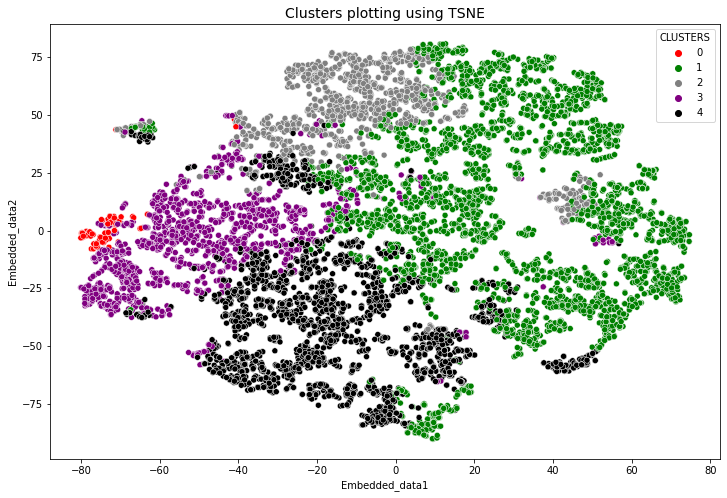

In [70]:
plt.figure(figsize=(12,8))
plt.title('Clusters plotting using TSNE', fontsize = 14)
sns.scatterplot(x = embedded_data_with_clusterlabels.loc[:,0], 
                y = embedded_data_with_clusterlabels.loc[:,1],
                hue=embedded_data_with_clusterlabels.loc[:,'CLUSTERS'],
                palette =['red','green','gray','purple', 'black'])
plt.xlabel('Embedded_data1')
plt.ylabel('Embedded_data2')
plt.show()

In [71]:
embedded_data = TSNE(n_components=3,learning_rate='auto',init='random').fit_transform(scaled_creditcard_data)
embedded_data.shape

(8949, 3)

In [72]:
embedded_data_with_clusterlabels = pd.concat([pd.DataFrame(embedded_data), pd.Series(KMEANS.labels_)], axis=1)

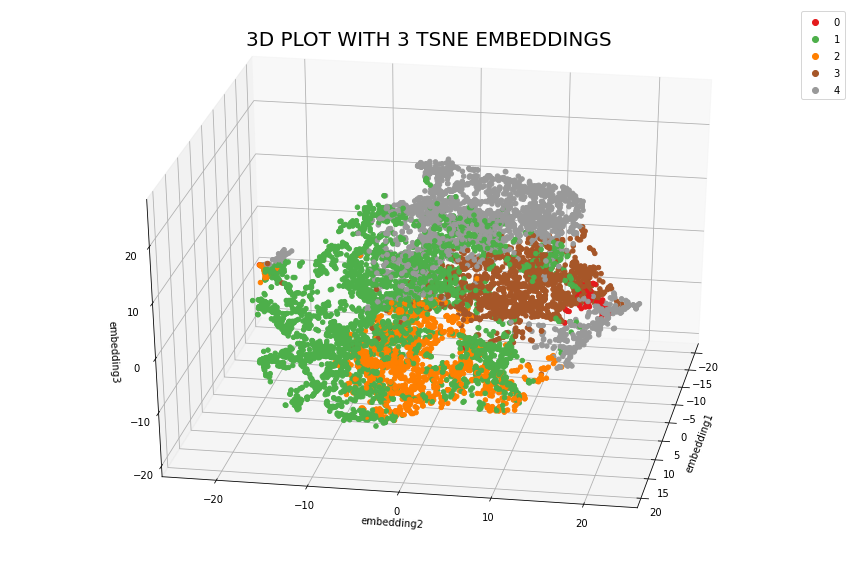



 1    3913
4    2414
3    1384
2    1152
0      86
Name: 0, dtype: int64


In [74]:
fig = plt.figure(figsize=(12,8))
ax = plt.axes(projection = '3d')
ax.view_init(30,10)
sc = ax.scatter3D(xs = embedded_data[:,0], 
                  ys = embedded_data_with_clusterlabels.iloc[:,1], 
                  zs = embedded_data_with_clusterlabels.iloc[:,2],
                  c=embedded_data_with_clusterlabels.iloc[:,3],
                  alpha=1, cmap = 'Set1')
ax.set_xlabel('embedding1', rotation = 80)
ax.set_ylabel('embedding2')
ax.set_zlabel('embedding3')
ax.set_title('3D PLOT WITH 3 TSNE EMBEDDINGS', fontsize = 20)
plt.legend(*sc.legend_elements())
plt.tight_layout()
plt.show()
print('\n\n', embedded_data_with_clusterlabels.iloc[:,3].value_counts())

In [75]:
# Applying the kmeans algorithm again after deleting the record.
KMEANS = KMeans(n_clusters = 4, max_iter = 500).fit(scaled_creditcard_data)
KMEANS_labels = pd.Series(KMEANS.labels_, name = 'CLUSTERS')
KMEANS_labels.value_counts()

0    3989
3    3354
2    1210
1     396
Name: CLUSTERS, dtype: int64

In [76]:
# Checking the cluster centers for the cluster attributes
cluster_centers = stdscaler.inverse_transform(KMEANS.cluster_centers_)
cluster_centers = pd.DataFrame(cluster_centers, columns = creditcard_data.columns)
cluster_centers.T

,0,1,2,3
BALANCE,1001.516168,3594.804621,4581.026209,906.471058
BALANCE_FREQUENCY,0.788317,0.987825,0.968562,0.937334
PURCHASES,272.478105,7815.591616,490.267785,1253.592997
ONEOFF_PURCHASES,210.364130,5213.055404,311.343322,603.002156
INSTALLMENTS_PURCHASES,62.380060,2604.051364,179.008488,650.866200
CASH_ADVANCE,587.666104,695.978299,4483.984804,213.150262
PURCHASES_FREQUENCY,0.174082,0.946132,0.283775,0.887568
ONEOFF_PURCHASES_FREQUENCY,0.086690,0.743090,0.136661,0.300173
PURCHASES_INSTALLMENTS_FREQUENCY,0.083988,0.787626,0.182574,0.713924
CASH_ADVANCE_FREQUENCY,0.113315,0.072999,0.483130,0.042873


## Cluster Analysis

1. **Silver cluster** (cust 0) Low balance to use lowest average credit limit low purchase frequency second lowest full payment. There is no much of transaction in this segment.
1. **Gold Cluster** (clust 3) These are the customers who use the card for purchases but they have highest cash advance. They dont like using credit. But looking at the credit limit and purhcases they are afluent category customers.
1. **Platinum Cluster** (clust 1) This is the second best group for the business may be we should upgrade them with higher limit and encourage them to use the card. 
1. **Titanium Cluster** (clust 2) This is best group of customers who contribute to the card business they have high credit limit and good puchase transaction, they like credit.

# Visualizing Clusters using TSNE - 2D plot

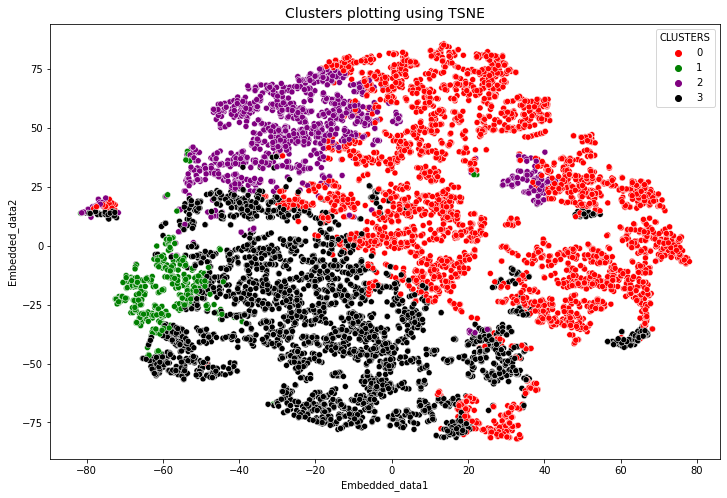

In [77]:
# Append labels to the scaled dataset for visualising in the pca and TSNE
embedded_data = TSNE(n_components=2,init='random',learning_rate='auto').fit_transform(scaled_creditcard_data)
embedded_data.shape
embedded_data_with_clusterlabels = pd.concat([pd.DataFrame(embedded_data), 
                                              pd.DataFrame({'CLUSTERS': KMEANS.labels_})], 
                                             axis=1)
plt.figure(figsize=(12,8))
plt.title('Clusters plotting using TSNE', fontsize = 14)
sns.scatterplot(x = embedded_data_with_clusterlabels.loc[:,0], 
                y = embedded_data_with_clusterlabels.loc[:,1],
                hue=embedded_data_with_clusterlabels.loc[:,'CLUSTERS'],
                palette =['red','green','purple', 'black'])
plt.xlabel('Embedded_data1')
plt.ylabel('Embedded_data2')
plt.show()

# Visualizing Clusters using TSNE - 3D plot

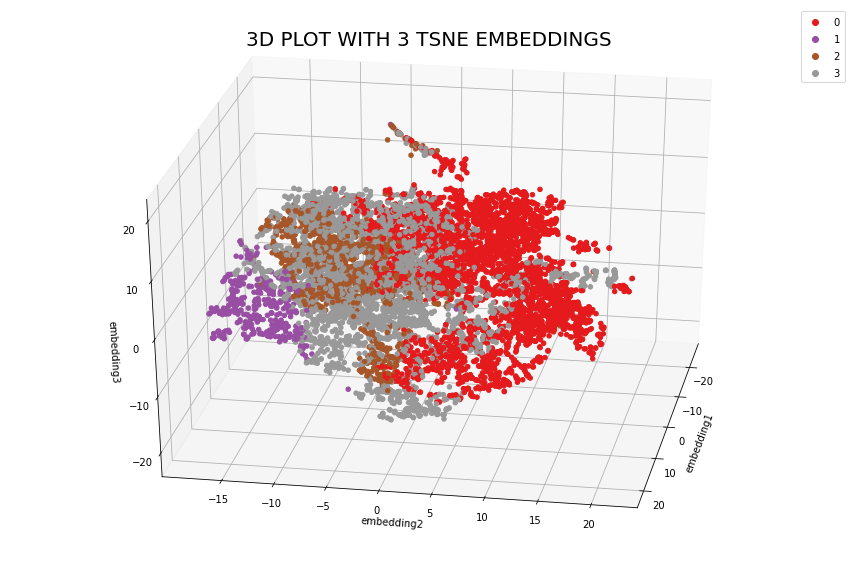



 0    3989
3    3354
2    1210
1     396
Name: 0, dtype: int64


In [79]:
embedded_data = TSNE(n_components=3,learning_rate='auto',init='random').fit_transform(scaled_creditcard_data)
embedded_data.shape
embedded_data_with_clusterlabels = pd.concat([pd.DataFrame(embedded_data), 
                                              pd.Series(KMEANS.labels_)], axis=1)
fig = plt.figure(figsize=(12,8))
ax = plt.axes(projection = '3d')
ax.view_init(30,10)
sc = ax.scatter3D(xs = embedded_data[:,0], 
                  ys = embedded_data_with_clusterlabels.iloc[:,1], 
                  zs = embedded_data_with_clusterlabels.iloc[:,2],
                  c=embedded_data_with_clusterlabels.iloc[:,3],
                  alpha=1, cmap = 'Set1')
ax.set_xlabel('embedding1', rotation = 80)
ax.set_ylabel('embedding2')
ax.set_zlabel('embedding3')
ax.set_title('3D PLOT WITH 3 TSNE EMBEDDINGS', fontsize = 20)
plt.legend(*sc.legend_elements())
plt.tight_layout()
plt.show()
print('\n\n', embedded_data_with_clusterlabels.iloc[:,3].value_counts())